## Juan David Galan Vargas - 202111470
# Muestra de entrenamiento de Cumulos con GAIA DR3, Hunt 2023

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.stats import norm
from scipy.stats import zscore as zs
import os

c:\Users\juang\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\juang\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
archivo = 'catalogo.csv'
df = pd.read_csv(archivo)
columnas=df.columns

In [3]:
df.head()

,Name,ID,GaiaDR3,inrt,Prob,RA_ICRS,DE_ICRS,pmRA,pmDE,Plx,Gmag,BPmag,RPmag,RV,_RA_icrs,_DE_icrs
0,HSC_1313,2856,4916260085635456,0,1.000000,41.237325,3.957881,10.64,-12.34,1.519,20.044415,20.879393,19.119940,NaN,41.237278,3.957936
1,HSC_1313,2856,4965330087149056,0,1.000000,42.615000,4.089997,10.85,-12.88,1.459,17.527039,18.348484,16.187153,NaN,42.614952,4.090055
2,HSC_1313,2856,5047892243245696,1,1.000000,42.328928,4.533813,11.09,-11.88,1.500,18.013546,19.221575,16.898410,NaN,42.328878,4.533866
3,HSC_1313,2856,5454303523876608,0,0.942448,42.968331,4.856946,10.59,-13.99,1.427,17.077087,18.034590,16.120436,NaN,42.968284,4.857008
4,HSC_1313,2856,5496492987454208,0,0.967269,43.557567,4.985608,10.61,-12.10,1.490,17.686493,18.710737,16.697807,NaN,43.557520,4.985662


In [3]:
columns_to_drop = ['ID',"GaiaDR3","inrt","RV", '_RA_icrs',"_DE_icrs"] 
df = df.drop(columns=columns_to_drop)
df.head()



,Name,Prob,RA_ICRS,DE_ICRS,pmRA,pmDE,Plx,Gmag,BPmag,RPmag
0,HSC_1313,1.000000,41.237325,3.957881,10.64,-12.34,1.519,20.044415,20.879393,19.119940
1,HSC_1313,1.000000,42.615000,4.089997,10.85,-12.88,1.459,17.527039,18.348484,16.187153
2,HSC_1313,1.000000,42.328928,4.533813,11.09,-11.88,1.500,18.013546,19.221575,16.898410
3,HSC_1313,0.942448,42.968331,4.856946,10.59,-13.99,1.427,17.077087,18.034590,16.120436
4,HSC_1313,0.967269,43.557567,4.985608,10.61,-12.10,1.490,17.686493,18.710737,16.697807


In [4]:
def kpc(x):
    x=abs(x)
    x=1/x
    return x

In [5]:
df = df.rename(columns={'Plx': 'Kpc'})
df['Kpc'] = df['Kpc'].apply(kpc)

print(len(df))
df.head()

1291929


,Name,Prob,RA_ICRS,DE_ICRS,pmRA,pmDE,Kpc,Gmag,BPmag,RPmag
0,HSC_1313,1.000000,41.237325,3.957881,10.64,-12.34,0.658328,20.044415,20.879393,19.119940
1,HSC_1313,1.000000,42.615000,4.089997,10.85,-12.88,0.685401,17.527039,18.348484,16.187153
2,HSC_1313,1.000000,42.328928,4.533813,11.09,-11.88,0.666667,18.013546,19.221575,16.898410
3,HSC_1313,0.942448,42.968331,4.856946,10.59,-13.99,0.700771,17.077087,18.034590,16.120436
4,HSC_1313,0.967269,43.557567,4.985608,10.61,-12.10,0.671141,17.686493,18.710737,16.697807


In [6]:
df = df[df['Kpc'] <= 1]
print(len(df))

212663


Text(0.5, 1.0, 'Distancia de las estrellas en cumulos (Hunt, 2023)')

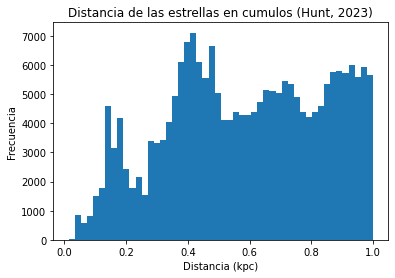

In [19]:
plt.hist(df["Kpc"], bins=50)
plt.xlabel("Distancia (kpc)")
plt.ylabel("Frecuencia")
plt.title("Distancia de las estrellas en cumulos (Hunt, 2023)")

Text(0.5, 1.0, 'Distancia de las estrellas en cumulos (Hunt, 2023)')

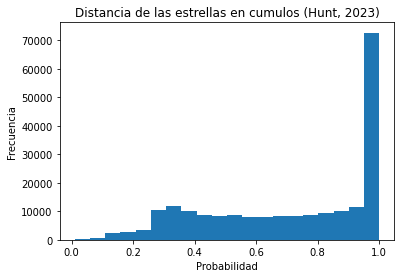

In [20]:
plt.hist(df["Prob"], bins=20)
#plt.xscale("log")
plt.xlabel("Probabilidad")
plt.ylabel("Frecuencia")
plt.title("Distancia de las estrellas en cumulos (Hunt, 2023)")

In [7]:
name_dataframes = {}
for name in df['Name'].unique():
    name_df = df[df['Name'] == name]
    name_dataframes[name] = name_df


In [8]:
nombres_cumulos=name_dataframes.keys()
print(len(nombres_cumulos))
nombres_cumulos=list(nombres_cumulos)
print(nombres_cumulos)

1861
['HSC_1313', 'HSC_1438', 'Melotte_25', 'HSC_1437', 'HSC_1580', 'HSC_1373', 'HSC_1288', 'HSC_1369', 'HSC_1630', 'Melotte_22', 'HSC_1340', 'HSC_1390', 'OCSN_50', 'HSC_1346', 'Alessi-Teutsch_10', 'HSC_1195', 'HSC_1238', 'UPK_303', 'HSC_1250', 'NGC_1333', 'Alessi-Teutsch_9', 'HSC_1147', 'NGC_752', 'HSC_1155', 'HSC_1176', 'UPK_305', 'Theia_71', 'NGC_1647', 'HSC_1394', 'CWNU_1129', 'Theia_7', 'HSC_1481', 'CWNU_52', 'HSC_1368', 'UBC_199', 'HSC_1318', 'HSC_1403', 'Theia_54', 'Theia_93', 'HSC_1347', 'HSC_1314', 'HSC_1326', 'OC_0279', 'OC_0280', 'IC_348', 'UBC_4', 'NGC_1579', 'HSC_1291', 'COIN-Gaia_11', 'Alessi_96', 'COIN-Gaia_10', 'HSC_1268', 'HSC_1270', 'HSC_1361', 'COIN-Gaia_20', 'Theia_780', 'HXWHB_8', 'HSC_1343', 'COIN-Gaia_18', 'Theia_943', 'Theia_387', 'ASCC_14', 'HSC_1334', 'HSC_1348', 'NGC_1912', 'HSC_1341', 'Theia_3980', 'Saloranta_10', 'HSC_1331', 'COIN-Gaia_15', 'HSC_1308', 'CWNU_154', 'COIN-Gaia_14', 'UPK_347', 'HSC_1279', 'COIN-Gaia_12', 'Stock_10', 'Theia_874', 'COIN-Gaia_13'

In [9]:
for cumulo in nombres_cumulos:
    l=name_dataframes[cumulo]
    if len(l)<50:
        name_dataframes.pop(cumulo, None)



In [10]:
nombres_cumulos=name_dataframes.keys()
print(len(nombres_cumulos))
nombres_cumulos=list(nombres_cumulos)
print(nombres_cumulos)

856
['HSC_1438', 'Melotte_25', 'HSC_1580', 'HSC_1288', 'HSC_1630', 'Melotte_22', 'HSC_1340', 'Alessi-Teutsch_10', 'UPK_303', 'Alessi-Teutsch_9', 'NGC_752', 'HSC_1155', 'HSC_1176', 'UPK_305', 'NGC_1647', 'CWNU_52', 'HSC_1368', 'HSC_1318', 'HSC_1403', 'Theia_93', 'HSC_1314', 'HSC_1326', 'OC_0279', 'OC_0280', 'IC_348', 'UBC_4', 'NGC_1579', 'COIN-Gaia_11', 'Alessi_96', 'Theia_780', 'Theia_943', 'Theia_387', 'COIN-Gaia_12', 'Stock_10', 'Theia_874', 'COIN-Gaia_13', 'Theia_856', 'HSC_1330', 'HSC_1142', 'OCSN_49', 'Theia_390', 'HSC_1262', 'NGC_1342', 'UPK_333', 'Melotte_20', 'ASCC_11', 'COIN-Gaia_9', 'Teutsch_176', 'HSC_1213', 'HSC_1131', 'HSC_1179', 'HSC_1165', 'NGC_1582', 'Gulliver_11', 'UBC_56', 'Teutsch_J0450.9+5209', 'FSR_0686', 'NGC_1545', 'NGC_1708', 'Alessi_2', 'Renou_23', 'NGC_1528', 'UPK_312', 'Theia_1040', 'Theia_1086', 'CWNU_1137', 'HSC_1149', 'Platais_3', 'HSC_921', 'HSC_1058', 'NGC_1039', 'UPK_282', 'COIN-Gaia_8', 'Theia_701', 'HSC_979', 'Alessi_94', 'Casado-Alessi_1', 'LISC_3534

In [11]:
miembros=[]
for x in nombres_cumulos:
    miembros.append(len(name_dataframes[x]))


Text(0.5, 1.0, 'Estrellas de cumulos para muestra de entrenamiento')

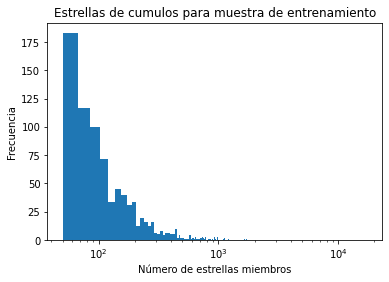

In [12]:
plt.hist(miembros, bins=1000)
plt.xscale("log")
plt.xlabel("Número de estrellas miembros")
plt.ylabel("Frecuencia")
plt.title("Estrellas de cumulos para muestra de entrenamiento")

190198


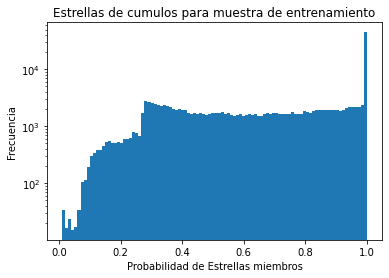

In [20]:
probabilidad=[]

for key, df in name_dataframes.items():
    if 'Prob' in df.columns:
        probabilidad.extend(df['Prob'].tolist())
        
plt.hist(probabilidad, bins=100)
plt.yscale("log")
plt.xlabel("Probabilidad de Estrellas miembros")
plt.ylabel("Frecuencia")
plt.title("Estrellas de cumulos para muestra de entrenamiento")
print(len(probabilidad))

In [21]:
def scaled_value(min_value, max_value, base_value, input_value):
    ratio = (max_value - input_value) / (max_value - min_value)
    return (ratio * base_value)+input_value

In [13]:
def graficar(nombre,inf,sup):
    df1=name_dataframes[nombre]
    fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1, 5, figsize=(25, 5))
    ax1.scatter(df1["BPmag"]-df1["RPmag"],df1["Gmag"],marker=".")
    ax1.grid(True)
    ax1.set_xlabel("Bp-Rp")
    ax1.set_ylabel("Gmag")
    ax1.set_title(nombre+" Distancia Real: "+str(round(sum(df1["Kpc"])/len(df1["Kpc"]),2))+" Kpc")
    ax1.invert_yaxis()
    
    df2=df1.copy()
    
    mag_abs=df2["Gmag"]-5*np.log10(df2["Kpc"]*1000)+5
    rango=np.linspace(inf,sup,10000)
    distancia=random.choice(rango)
    df2["Gmag"]=mag_abs+5*np.log10(distancia)-5
    
    ax2.scatter(df2["BPmag"]-df2["RPmag"],df2["Gmag"],marker=".")
    ax2.grid(True)
    ax2.set_xlabel("Bp-Rp")
    ax2.set_ylabel("Gmag")
    ax2.set_title(nombre+" Distancia Ajustada: "+str(round(distancia/1000,2))+" Kpc")
    ax2.set_ylim(None,21)
    ax2.invert_yaxis()
    
    df3=df2.copy()
    df3["Gmag"]=df3["Gmag"]+0.555
    ax3.scatter((df3["BPmag"]-df3["RPmag"])+0.4,df3["Gmag"],marker=".")
    ax3.grid(True)
    ax3.set_xlabel("Bp-Rp")
    ax3.set_ylabel("Gmag")
    ax3.set_title(nombre+" AG max: "+ str(0.55)+" E(Bp-Rp) max: "+str(0.4))
    ax3.set_ylim(None,21)
    ax3.invert_yaxis()  
    
    
    df4=df2.copy()
    var=np.linspace(-0.05,0.05,100)
    a=random.choice(var)
    
    maximo=df4["Gmag"].max()
    minimo=df4["Gmag"].min()
    
    prueba_cte=df4["Gmag"]+0.5+a
    df4["Gmag"] = df4["Gmag"].apply(lambda x: scaled_value(minimo, maximo, 0.5 + a, x))

    b=random.choice(var)

    #ax4.scatter((df4["BPmag"]-df4["RPmag"])+0.3+b,df4["Gmag"],marker=".",color="r",label="dep c",alpha=0.5)
    ax4.scatter((df4["BPmag"]-df4["RPmag"])+0.3+b,prueba_cte,marker=".")
    ax4.grid(True)
    ax4.set_xlabel("Bp-Rp")
    ax4.set_ylabel("Gmag")
    ax4.set_title(nombre+" AG: "+ str(round(0.5+a,2))+" E(Bp-Rp): "+str(round(0.3+b,2)))
    ax4.set_ylim(None,21)
    ax4.invert_yaxis()

    
    df5=df4.copy()

    noise_level = 0.5  # desviacion estandar
    variacion_c=np.concatenate((np.linspace(-0.25,-0.15,43),np.linspace(0.15,0.25,43)))
    variacion_m=np.linspace(-0.15,0.15,93)
    
        
    ruido_color=noise_level+random.choice(variacion_c)
    ruido_mag=noise_level+random.choice(variacion_m)
    
    if ruido_color >= ruido_mag:
        ruido_color=noise_level+random.choice(variacion_c)
    
    
    noise_mag = np.random.normal(0, ruido_mag, df5["Gmag"].shape)            
    df5["Gmag"] = df5["Gmag"] + noise_mag

    noise_color=np.random.normal(0, ruido_color, df5["BPmag"].shape)
    ax5.scatter((df5["BPmag"]-df5["RPmag"])+noise_color,df5["Gmag"],marker=".")
    ax5.grid(True)
    ax5.set_xlabel("Bp-Rp")
    ax5.set_ylabel("Gmag")
    ax5.set_title(nombre+" Ruido Color: "+ str(round(ruido_color,2))+" Ruido Mag: "+str(round(ruido_mag,2)))
    ax5.set_ylim(None,21)
    ax5.invert_yaxis()


In [ ]:

for i in range(10):
    cumulo=random.choice(nombres_cumulos)
    graficar(cumulo,4000,5000)
    graficar(cumulo,5000,6000)
    i+=1
#graficar('UBC_378')
#graficar('HSC_2964')
#graficar("NGC_6425")

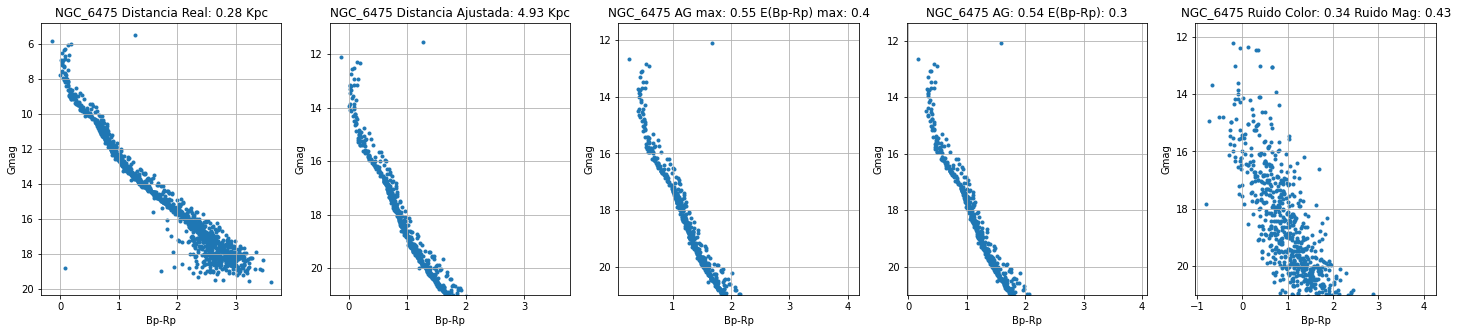

In [16]:
graficar("NGC_6475",4000,5000)

In [ ]:
def plot_gaussian(mean, std_dev,a,b):
    # Generate a range of x values
    x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
    # Calculate the corresponding y values for the normal distribution
    y = norm.pdf(x, mean, std_dev)
    
    # Plot the distribution
    plt.plot(x, y, label=f'Mean: {mean}, Std Dev: {std_dev}')
    plt.axvline(a)
    plt.axvline(b)
    plt.title('Normal Gaussian Distribution')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.grid(True)
    plt.legend()
    plt.show()

plot_gaussian(0.9,0.15,0.6,1.2)
plot_gaussian(0.6,0.2,0.5,1.4)

In [39]:
def gaussian_in_interval(mean, std_dev, lower_bound, upper_bound, size):
    valid_values = []
    size=int(size)
    # Keep generating values until we have 'size' valid values
    while len(valid_values) < size:
        # Generate 10 random values
        values = np.random.normal(mean, std_dev, size=size)
        # Filter out the values within the bounds
        filtered_values = [v for v in values if lower_bound <= v <= upper_bound]
        # Add the filtered values to the list of valid values
        valid_values.extend(filtered_values)
    
    # Return the first 'size' values from the valid list
    return valid_values[:size]


In [18]:
def graficar_cumulos_y_nocumulos(nombre):
    df = name_dataframes[nombre]
    fig, ax = plt.subplots(2, 4, figsize=(25, 15))  # Create 2x4 grid of subplots
    print(nombre + " Distancia Real: " + str(round(sum(df["Kpc"]) / len(df["Kpc"]), 2)) + " Kpc")
    
    # Shell 1
    rango_shell1 = np.linspace(4000, 5000, 10000)
    df1 = df.copy()

    mag_abs = df1["Gmag"] - 5 * np.log10(df1["Kpc"] * 1000) + 5
    distancia = random.choice(rango_shell1)
    df1["Gmag"] = mag_abs + 5 * np.log10(distancia) - 5

    var = np.linspace(-0.05, 0.05, 100)
    a = random.choice(var)

    prueba_cte = df1["Gmag"] + 0.2 + a
    b = random.choice(var)

    # Plot 1
    ax[0, 0].scatter((df1["BPmag"] - df1["RPmag"]) + 0.3 + b, prueba_cte, marker=".")
    ax[0, 0].grid(True)
    ax[0, 0].set_xlabel("Bp-Rp")
    ax[0, 0].set_ylabel("Gmag")
    ax[0, 0].set_title(nombre + " Dist: " + str(round(distancia / 1000, 2)) + " Kpc " + 
                       " AG: " + str(round(0.2 + a, 2)) + " E(Bp-Rp): " + str(round(0.3 + b, 2)))
    ax[0, 0].set_ylim(11, 21)
    ax[0,0].set_xlim(-1,4)
    ax[0, 0].invert_yaxis()

    df2 = df.copy()
    mag_abs = df["Gmag"] - 5 * np.log10(df["Kpc"] * 1000) + 5
    df2["Gmag"] = mag_abs + 5 * np.log10(distancia) - 5

    a = random.choice(var)
    prueba_cte = df1["Gmag"] + 0.5 + a
    b = random.choice(var)

    # Plot 2
    ax[0, 1].scatter((df2["BPmag"] - df2["RPmag"]) + 0.3 + b, prueba_cte, marker=".")
    ax[0, 1].grid(True)
    ax[0, 1].set_xlabel("Bp-Rp")
    ax[0, 1].set_ylabel("Gmag")
    ax[0, 1].set_title(nombre + " Dist: " + str(round(distancia / 1000, 2)) + " Kpc " + 
                       " AG: " + str(round(0.5 + a, 2)) + " E(Bp-Rp): " + str(round(0.3 + b, 2)))
    ax[0, 1].set_ylim(11, 21)
    ax[0,1].set_xlim(-1,4)
    ax[0, 1].invert_yaxis()

    # Shell 1 non-cluster data (df3)
    df3 = df1.copy()
    var_nocumulo_mag = np.linspace(0.6, 1.2, 100)
    var_nocumulo_color = np.linspace(0.5, 1.4, 100)
    a = np.random.choice(var_nocumulo_mag)
    b = np.random.choice(var_nocumulo_color)
    ext = gaussian_in_interval(a, 0.15, 0.6, 1.2, df3["Gmag"].shape[0])
    exc_col = gaussian_in_interval(b, 0.2, 0.5, 1.4, df3["Gmag"].shape[0])
    df3["Gmag"] = df3["Gmag"] + ext

    # Plot 3
    ax[0, 2].scatter((df3["BPmag"] - df3["RPmag"]) + exc_col, df3["Gmag"], marker=".")
    ax[0, 2].grid(True)
    ax[0, 2].set_xlabel("Bp-Rp")
    ax[0, 2].set_ylabel("Gmag")
    ax[0, 2].set_title(nombre + " AG: " + str(round(a, 2)) + " E(Bp-Rp): " + str(round(b, 2)))
    ax[0, 2].set_ylim(11, 21)
    ax[0,2].set_xlim(-1,4)
    ax[0, 2].invert_yaxis()

    # Plot 4
    df4 = df1.copy()
    var_nocumulo_mag = np.linspace(1.2, 2.5, 100)
    var_nocumulo_color = np.linspace(1.4, 2, 100)
    a = np.random.choice(var_nocumulo_mag)
    b = np.random.choice(var_nocumulo_color)

    #ext = np.random.normal(a, 0.5, df4["Gmag"].shape)
    #exc_col = np.random.normal(b, 0.5, df4["Gmag"].shape)
    ext = gaussian_in_interval(a, 0.5, 1.2, 10, df3["Gmag"].shape[0])
    exc_col = gaussian_in_interval(b, 1, 1.4, 10, df3["Gmag"].shape[0])
    df4["Gmag"] = df4["Gmag"] + ext

    ax[0, 3].scatter((df4["BPmag"] - df4["RPmag"]) + exc_col, df4["Gmag"], marker=".")
    ax[0, 3].grid(True)
    ax[0, 3].set_xlabel("Bp-Rp")
    ax[0, 3].set_ylabel("Gmag")
    ax[0, 3].set_title(nombre + " AG: " + str(round(a, 2)) + " E(Bp-Rp): " + str(round(b, 2)))
    ax[0, 3].set_ylim(11, 21)
    ax[0,3].set_xlim(-1,4)
    ax[0, 3].invert_yaxis()

    # Shell 2
    rango_shell2 = np.linspace(5000, 6000, 10000)
    df5 = df.copy()

    mag_abs = df5["Gmag"] - 5 * np.log10(df5["Kpc"] * 1000) + 5
    distancia = random.choice(rango_shell2)
    df5["Gmag"] = mag_abs + 5 * np.log10(distancia) - 5

    a = random.choice(var)
    prueba_cte = df5["Gmag"] + 0.2 + a
    b = random.choice(var)

    # Plot 5
    ax[1, 0].scatter((df5["BPmag"] - df5["RPmag"]) + 0.3 + b, prueba_cte, marker=".")
    ax[1, 0].grid(True)
    ax[1, 0].set_xlabel("Bp-Rp")
    ax[1, 0].set_ylabel("Gmag")
    ax[1, 0].set_title(nombre + " Dist: " + str(round(distancia / 1000, 2)) + " Kpc " + 
                       " AG: " + str(round(0.2 + a, 2)) + " E(Bp-Rp): " + str(round(0.3 + b, 2)))
    ax[1, 0].set_ylim(None, 21)
    ax[1, 0].invert_yaxis()

    df6 = df.copy()
    mag_abs = df["Gmag"] - 5 * np.log10(df["Kpc"] * 1000) + 5
    df6["Gmag"] = mag_abs + 5 * np.log10(distancia) - 5

    a = random.choice(var)
    prueba_cte = df6["Gmag"] + 0.5 + a
    b = random.choice(var)

    # Plot 6
    ax[1, 1].scatter((df6["BPmag"] - df6["RPmag"]) + 0.3 + b, prueba_cte, marker=".")
    ax[1, 1].grid(True)
    ax[1, 1].set_xlabel("Bp-Rp")
    ax[1, 1].set_ylabel("Gmag")
    ax[1, 1].set_title(nombre + " Dist: " + str(round(distancia / 1000, 2)) + " Kpc " + 
                       " AG: " + str(round(0.5 + a, 2)) + " E(Bp-Rp): " + str(round(0.3 + b, 2)))
    ax[1, 1].set_ylim(11, 21)
    ax[1,1].set_xlim(-1,4)
    ax[1, 1].invert_yaxis()

    # Shell 2 non-cluster data (df7)
    df7 = df5.copy()
    var_nocumulo_mag = np.linspace(0.6, 1.2, 100)
    var_nocumulo_color = np.linspace(0.5, 1.4, 100)
    a = np.random.choice(var_nocumulo_mag)
    b = np.random.choice(var_nocumulo_color)
    ext = gaussian_in_interval(a, 0.15, 0.6, 1.2, df7["Gmag"].shape[0])
    exc_col = gaussian_in_interval(b, 0.2, 0.5, 1.4, df7["Gmag"].shape[0])
    df7["Gmag"] = df7["Gmag"] + ext

    # Plot 7
    ax[1, 2].scatter((df7["BPmag"] - df7["RPmag"]) + exc_col, df7["Gmag"], marker=".")
    ax[1, 2].grid(True)
    ax[1, 2].set_xlabel("Bp-Rp")
    ax[1, 2].set_ylabel("Gmag")
    ax[1, 2].set_title(nombre + " AG: " + str(round(a, 2)) + " E(Bp-Rp): " + str(round(b, 2)))
    ax[1, 2].set_ylim(11, 21)
    ax[1,2].set_xlim(-1,4)
    ax[1, 2].invert_yaxis()

    # Plot 8
    df8 = df5.copy()
    var_nocumulo_mag = np.linspace(1.2, 2.5, 100)
    var_nocumulo_color = np.linspace(1.4, 2, 100)
    a = np.random.choice(var_nocumulo_mag)
    b = np.random.choice(var_nocumulo_color)

    #ext = np.random.normal(a, 0.5, df8["Gmag"].shape)
    #exc_col = np.random.normal(b, 0.5, df8["Gmag"].shape)
    ext = gaussian_in_interval(a, 0.5, 1.2, 10, df3["Gmag"].shape[0])
    exc_col = gaussian_in_interval(b, 1, 1.4, 10, df3["Gmag"].shape[0])
    df8["Gmag"] = df8["Gmag"] + ext

    ax[1, 3].scatter((df8["BPmag"] - df8["RPmag"]) + exc_col, df8["Gmag"], marker=".")
    ax[1, 3].grid(True)
    ax[1, 3].set_xlabel("Bp-Rp")
    ax[1, 3].set_ylabel("Gmag")
    ax[1, 3].set_title(nombre + " AG: " + str(round(a, 2)) + " E(Bp-Rp): " + str(round(b, 2)))
    ax[1, 3].set_ylim(11, 21)
    ax[1,3].set_xlim(-1,4)
    ax[1, 3].invert_yaxis()

    plt.tight_layout()
    plt.show()

# Example usage:
# graficar_cumulos_y_nocumulos("some_dataframe_name")


Alessi_37 Distancia Real: 0.72 Kpc


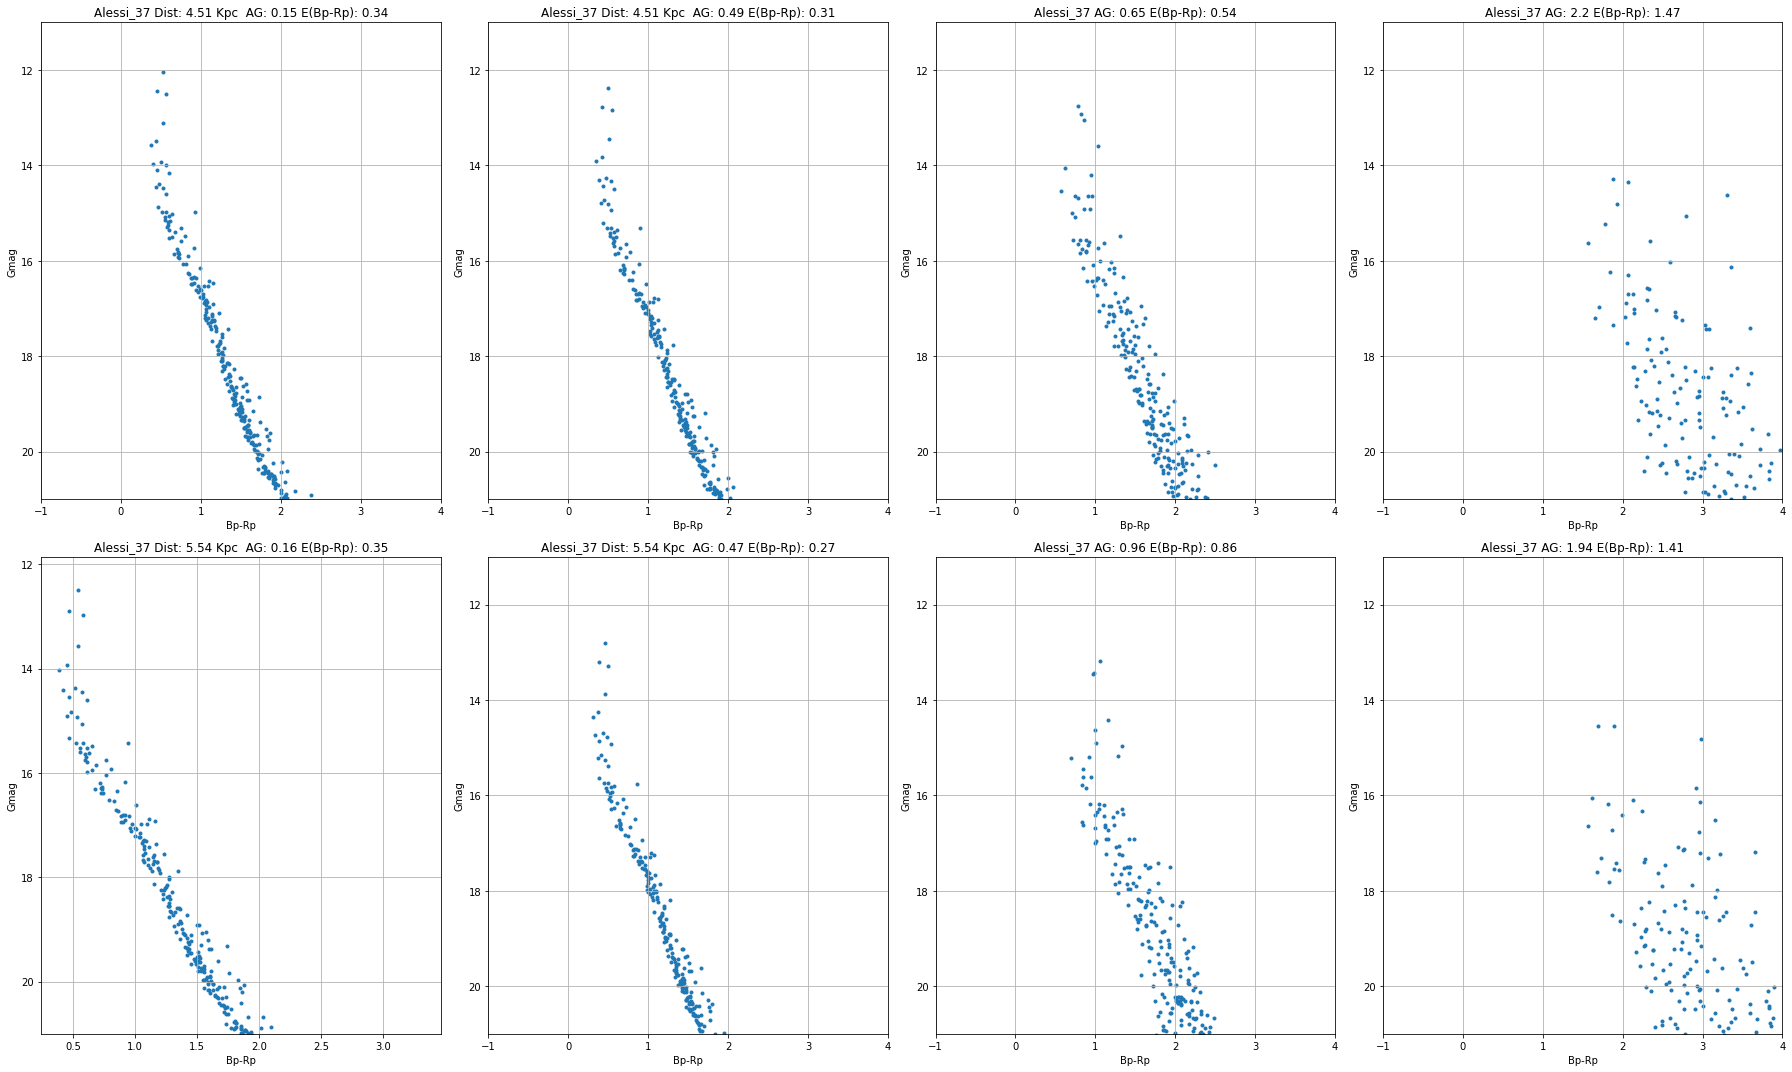

In [17]:
graficar_cumulos_y_nocumulos("Alessi_37")

In [16]:
type(nombres_cumulos)

list

In [ ]:
for i in range(100):
    cumulo=nombres_cumulos[i]
    graficar_cumulos_y_nocumulos(cumulo)
    i+=1

In [ ]:
for i in range(100):
    cumulo=nombres_cumulos[i+100]
    graficar_cumulos_y_nocumulos(cumulo)
    i+=1

In [ ]:
for i in range(200):
    cumulo=nombres_cumulos[i+200]
    graficar_cumulos_y_nocumulos(cumulo)
    i+=1

In [ ]:
for i in range(200):
    cumulo=nombres_cumulos[i+400]
    graficar_cumulos_y_nocumulos(cumulo)
    i+=1

In [ ]:
for i in range(200):
    cumulo=nombres_cumulos[i+600]
    graficar_cumulos_y_nocumulos(cumulo)
    i+=1

In [ ]:
for i in range(56):
    cumulo=nombres_cumulos[i+800]
    graficar_cumulos_y_nocumulos(cumulo)
    i+=1

In [ ]:
for i in range(100):
    cumulo=random.choice(nombres_cumulos)
    graficar_cumulos_y_nocumulos(cumulo)
    i+=1

In [15]:
def graficar_cumulos_y_nocumulos_estandarizado(nombre):
    df = name_dataframes[nombre]
    fig, ax = plt.subplots(2, 6, figsize=(30, 15))  # Create 2x4 grid of subplots
    print(nombre + " Distancia Real: " + str(round(sum(df["Kpc"]) / len(df["Kpc"]), 2)) + " Kpc")
    
    # Shell 1
    rango_shell1 = np.linspace(4000, 5000, 10000)
    df1 = df.copy()

    mag_abs = df1["Gmag"] - 5 * np.log10(df1["Kpc"] * 1000) + 5
    distancia = random.choice(rango_shell1)
    df1["Gmag"] = mag_abs + 5 * np.log10(distancia) - 5

    var = np.linspace(-0.05, 0.05, 100)
    a = random.choice(var)
    
    df1_standar=df1.copy()
    df1_standar["Gmag"] = df1["Gmag"] + 0.2 + a
    b = random.choice(var)
    # Plot 1
    df1_standar["color"]= df1["BPmag"] - df1["RPmag"] + 0.3 + b
    df1_standar["Gmag"] = df1["Gmag"]
    df1_standar = df1_standar[df1_standar["Gmag"]<=21]
    df1_standar["color"]=zs(df1_standar["color"])
    df1_standar["Gmag"]=zs(df1_standar["Gmag"])
    
    #print(list(aaaa))
    
    ax[0, 0].scatter(list(df1_standar["color"]), list(df1_standar["Gmag"]), marker=".")
    ax[0,0].axis("off")
    #ax[0, 0].grid(True)
    #ax[0, 0].set_xlabel("Bp-Rp")
    #ax[0, 0].set_ylabel("Gmag")
    #ax[0, 0].set_title(nombre + " Dist: " + str(round(distancia / 1000, 2)) + " Kpc " + " AG: " + str(round(0.2 + a, 2)) + " E(Bp-Rp): " + str(round(0.3 + b, 2)))
    #ax[0, 0].set_ylim(11, 21)
    #ax[0,0].set_xlim(-1,4)
    ax[0, 0].invert_yaxis()
    
    
    df2 = df.copy()
    mag_abs = df["Gmag"] - 5 * np.log10(df["Kpc"] * 1000) + 5
    df2["Gmag"] = mag_abs + 5 * np.log10(distancia) - 5

    a = random.choice(var)
    b = random.choice(var)
    
    df2_standar=df2.copy()
    df2_standar["Gmag"] = df2["Gmag"] + 0.2 + a
    df2_standar["color"]= df2["BPmag"] - df2["RPmag"] + 0.3 + b
    df2_standar = df2_standar[df2_standar["Gmag"]<=21]
    df2_standar["color"]=zs(df2_standar["color"])
    df2_standar["Gmag"]=zs(df2_standar["Gmag"])

    # Plot 2
    ax[0, 1].scatter(df2_standar["color"], df2_standar["Gmag"], marker=".")
    ax[0, 1].grid(True)
    ax[0, 1].set_xlabel("Bp-Rp")
    ax[0, 1].set_ylabel("Gmag")
    ax[0, 1].set_title(" AG: " + str(round(0.5 + a, 2)) + " E(Bp-Rp): " + str(round(0.3 + b, 2)))
    #ax[0, 1].set_ylim(11, 21)
    #ax[0,1].set_xlim(-1,4)
    ax[0, 1].invert_yaxis()
    
    df25 = df.copy()
    mag_abs = df["Gmag"] - 5 * np.log10(df["Kpc"] * 1000) + 5
    df25["Gmag"] = mag_abs + 5 * np.log10(distancia) - 5

    a = random.choice(var)
    b = random.choice(var)
    
    df25_standar=df25.copy()
    df25_standar["Gmag"] = df25["Gmag"] + 0.2 + a
    df25_standar["color"]= df25["BPmag"] - df25["RPmag"] + 0.3 + b
    df25_standar = df25_standar[df25_standar["Gmag"]<=21]
    df25_standar["color"]=zs(df25_standar["color"])
    df25_standar["Gmag"]=zs(df25_standar["Gmag"])

    # Plot 2
    ax[0, 2].scatter(df25_standar["color"], df25_standar["Gmag"], marker=".")
    ax[0, 2].grid(True)
    ax[0, 2].set_xlabel("Bp-Rp")
    ax[0, 2].set_ylabel("Gmag")
    ax[0, 2].set_title(" AG: " + str(round(0.5 + a, 2)) + " E(Bp-Rp): " + str(round(0.3 + b, 2)))
    #ax[0, 1].set_ylim(11, 21)
    #ax[0,1].set_xlim(-1,4)
    ax[0, 2].invert_yaxis()
    
    

    # Shell 1 non-cluster data (df3)
    df3 = df1.copy()
    var_nocumulo_mag = np.linspace(0.6, 1.2, 100)
    var_nocumulo_color = np.linspace(0.5, 1.4, 100)
    a = np.random.choice(var_nocumulo_mag)
    b = np.random.choice(var_nocumulo_color)
    ext = gaussian_in_interval(a, 0.15, 0.6, 1.2, df3["Gmag"].shape[0])
    exc_col = gaussian_in_interval(b, 0.5, 0.5, 1.4, df3["Gmag"].shape[0])
    df3["Gmag"] = df3["Gmag"] + ext

    df3_standar=df3.copy()
    df3_standar["color"]= df3["BPmag"] - df3["RPmag"] + exc_col
    df3_standar["Gmag"] = df3["Gmag"]
    df3_standar = df3_standar[df3_standar["Gmag"]<=21]
    df3_standar["color"]=zs(df3_standar["color"])
    df3_standar["Gmag"]=zs(df3_standar["Gmag"])
    # Plot 3
    ax[0, 3].scatter(df3_standar["color"], df3_standar["Gmag"], marker=".")
    ax[0, 3].grid(True)
    ax[0, 3].set_xlabel("Bp-Rp")
    ax[0, 3].set_ylabel("Gmag")
    ax[0, 3].set_title(" AG: " + str(round(a, 2)) + " E(Bp-Rp): " + str(round(b, 2)))
    #ax[0, 2].set_ylim(11, 21)
    #ax[0,2].set_xlim(-1,4)
    ax[0, 3].invert_yaxis()
    
    # Shell 1 non-cluster data (df3)
    df35 = df1.copy()
    var_nocumulo_mag = np.linspace(1, 2, 100)
    var_nocumulo_color = np.linspace(1, 1.5, 100)
    a = np.random.choice(var_nocumulo_mag)
    b = np.random.choice(var_nocumulo_color)
    ext = gaussian_in_interval(a, 0.15, 0.5, 3, df35["Gmag"].shape[0])
    exc_col = gaussian_in_interval(b, 0.5, 0.4, 4, df35["Gmag"].shape[0])
    df35["Gmag"] = df35["Gmag"] + ext

    df35_standar=df35.copy()
    df35_standar["color"]= df35["BPmag"] - df35["RPmag"] + exc_col
    df35_standar["Gmag"] = df35["Gmag"]
    df35_standar = df35_standar[df35_standar["Gmag"]<=21]
    df35_standar["color"]=zs(df35_standar["color"])
    df35_standar["Gmag"]=zs(df35_standar["Gmag"])
    # Plot 3
    ax[0, 4].scatter(df35_standar["color"], df35_standar["Gmag"], marker=".")
    ax[0, 4].grid(True)
    ax[0, 4].set_xlabel("Bp-Rp")
    ax[0, 4].set_ylabel("Gmag")
    ax[0, 4].set_title(" AG: " + str(round(a, 2)) + " E(Bp-Rp): " + str(round(b, 2)))
    #ax[0, 2].set_ylim(11, 21)
    #ax[0,2].set_xlim(-1,4)
    ax[0, 4].invert_yaxis()

    # Plot 4
    df4 = df1.copy()
    var_nocumulo_mag = np.linspace(1.2, 2.5, 100)
    var_nocumulo_color = np.linspace(1.4, 2, 100)
    a = np.random.choice(var_nocumulo_mag)
    b = np.random.choice(var_nocumulo_color)

    #ext = np.random.normal(a, 0.5, df4["Gmag"].shape)
    #exc_col = np.random.normal(b, 0.5, df4["Gmag"].shape)
    ext = gaussian_in_interval(a, 0.5, 1, 5, df3["Gmag"].shape[0])
    exc_col = gaussian_in_interval(b, 1, 1, 10, df3["Gmag"].shape[0])
    df4["Gmag"] = df4["Gmag"] + ext
    
    df4_standar=df4.copy()
    df4_standar["color"]= df4["BPmag"] - df4["RPmag"] + exc_col
    df4_standar["Gmag"] = df4["Gmag"]
    df4_standar = df4_standar[df4_standar["Gmag"]<=21]
    df4_standar["color"]=zs(df4_standar["color"])
    df4_standar["Gmag"]=zs(df4_standar["Gmag"])

    ax[0, 5].scatter(df4_standar["color"], df4_standar["Gmag"], marker=".")
    ax[0, 5].grid(True)
    ax[0, 5].set_xlabel("Bp-Rp")
    ax[0, 5].set_ylabel("Gmag")
    ax[0, 5].set_title(" AG: " + str(round(a, 2)) + " E(Bp-Rp): " + str(round(b, 2)))
    #ax[0, 3].set_ylim(11, 21)
    #ax[0,3].set_xlim(-1,4)
    ax[0, 5].invert_yaxis()

    # Shell 2
    rango_shell2 = np.linspace(5000, 6000, 10000)
    df5 = df.copy()

    mag_abs = df5["Gmag"] - 5 * np.log10(df5["Kpc"] * 1000) + 5
    distancia = random.choice(rango_shell2)
    df5["Gmag"] = mag_abs + 5 * np.log10(distancia) - 5

    a = random.choice(var)
    b = random.choice(var)

    df5_standar=df5.copy()
    df5_standar["color"]= df5["BPmag"] - df5["RPmag"] + 0.3+b
    df5_standar["Gmag"] = df5["Gmag"] + 0.2 +a
    df5_standar = df5_standar[df5_standar["Gmag"]<=21]
    df5_standar["color"]=zs(df5_standar["color"])
    df5_standar["Gmag"]=zs(df5_standar["Gmag"])
    
    # Plot 5
    ax[1, 0].scatter(df5_standar["color"], df5_standar["Gmag"], marker=".")
    ax[1, 0].grid(True)
    ax[1, 0].set_xlabel("Bp-Rp")
    ax[1, 0].set_ylabel("Gmag")
    ax[1, 0].set_title(nombre + " Dist: " + str(round(distancia / 1000, 2)) + " Kpc " + 
                       " AG: " + str(round(0.2 + a, 2)) + " E(Bp-Rp): " + str(round(0.3 + b, 2)))
    #ax[1, 0].set_ylim(None, 21)
    ax[1, 0].invert_yaxis()

    df6 = df.copy()
    mag_abs = df["Gmag"] - 5 * np.log10(df["Kpc"] * 1000) + 5
    df6["Gmag"] = mag_abs + 5 * np.log10(distancia) - 5

    a = random.choice(var)
    b = random.choice(var)
    
    df6_standar=df6.copy()
    df6_standar["color"]= df6["BPmag"] - df6["RPmag"] + 0.3+b
    df6_standar["Gmag"] = df6["Gmag"] + 0.5 +a
    df6_standar = df6_standar[df6_standar["Gmag"]<=21]
    df6_standar["color"]=zs(df6_standar["color"])
    df6_standar["Gmag"]=zs(df6_standar["Gmag"])

    # Plot 6
    ax[1, 1].scatter(df6_standar["color"], df6_standar["Gmag"], marker=".")
    ax[1, 1].grid(True)
    ax[1, 1].set_xlabel("Bp-Rp")
    ax[1, 1].set_ylabel("Gmag")
    ax[1, 1].set_title(" AG: " + str(round(0.5 + a, 2)) + " E(Bp-Rp): " + str(round(0.3 + b, 2)))
    #ax[1, 1].set_ylim(11, 21)
    #ax[1,1].set_xlim(-1,4)
    ax[1, 1].invert_yaxis()
    
    df65 = df.copy()
    mag_abs = df["Gmag"] - 5 * np.log10(df["Kpc"] * 1000) + 5
    df65["Gmag"] = mag_abs + 5 * np.log10(distancia) - 5

    a = random.choice(var)
    b = random.choice(var)
    
    df65_standar=df65.copy()
    df65_standar["Gmag"] = df65["Gmag"] + 0.2 + a
    df65_standar["color"]= df65["BPmag"] - df65["RPmag"] + 0.3 + b
    df65_standar = df65_standar[df65_standar["Gmag"]<=21]
    df65_standar["color"]=zs(df65_standar["color"])
    df65_standar["Gmag"]=zs(df65_standar["Gmag"])

    # Plot 2
    ax[1, 2].scatter(df65_standar["color"], df65_standar["Gmag"], marker=".")
    ax[1, 2].grid(True)
    ax[1, 2].set_xlabel("Bp-Rp")
    ax[1, 2].set_ylabel("Gmag")
    ax[1, 2].set_title(" AG: " + str(round(0.5 + a, 2)) + " E(Bp-Rp): " + str(round(0.3 + b, 2)))
    #ax[0, 1].set_ylim(11, 21)
    #ax[0,1].set_xlim(-1,4)
    ax[1, 2].invert_yaxis()
    

    # Shell 2 non-cluster data (df7)
    df7 = df5.copy()
    var_nocumulo_mag = np.linspace(0.6, 1.2, 100)
    var_nocumulo_color = np.linspace(0.5, 1.4, 100)
    a = np.random.choice(var_nocumulo_mag)
    b = np.random.choice(var_nocumulo_color)
    ext = gaussian_in_interval(a, 0.15, 0.6, 1.2, df7["Gmag"].shape[0])
    exc_col = gaussian_in_interval(b, 0.5, 0.5, 1.4, df7["Gmag"].shape[0])
    df7["Gmag"] = df7["Gmag"] + ext

    df7_standar=df7.copy()
    df7_standar["color"]= df7["BPmag"] - df7["RPmag"] + exc_col
    df7_standar["Gmag"] = df7["Gmag"]
    df7_standar = df7_standar[df7_standar["Gmag"]<=21]
    df7_standar["color"]=zs(df7_standar["color"])
    df7_standar["Gmag"]=zs(df7_standar["Gmag"])
    
    # Plot 7
    ax[1, 3].scatter(df7_standar["color"], df7_standar["Gmag"], marker=".")
    ax[1, 3].grid(True)
    ax[1, 3].set_xlabel("Bp-Rp")
    ax[1, 3].set_ylabel("Gmag")
    ax[1, 3].set_title(" AG: " + str(round(a, 2)) + " E(Bp-Rp): " + str(round(b, 2)))
    #ax[1, 2].set_ylim(11, 21)
    #ax[1,2].set_xlim(-1,4)
    ax[1, 3].invert_yaxis()
    
    df75 = df5.copy()
    var_nocumulo_mag = np.linspace(1, 2, 100)
    var_nocumulo_color = np.linspace(1, 1.5, 100)
    a = np.random.choice(var_nocumulo_mag)
    b = np.random.choice(var_nocumulo_color)
    ext = gaussian_in_interval(a, 0.15, 0.5, 3, df35["Gmag"].shape[0])
    exc_col = gaussian_in_interval(b, 0.5, 0.4, 4, df35["Gmag"].shape[0])
    df75["Gmag"] = df75["Gmag"] + ext

    df75_standar=df75.copy()
    df75_standar["color"]= df75["BPmag"] - df75["RPmag"] + exc_col
    df75_standar["Gmag"] = df35["Gmag"]
    df75_standar = df75_standar[df75_standar["Gmag"]<=21]
    df75_standar["color"]=zs(df75_standar["color"])
    df75_standar["Gmag"]=zs(df75_standar["Gmag"])
    # Plot 3
    ax[1, 4].scatter(df75_standar["color"], df75_standar["Gmag"], marker=".")
    ax[1, 4].grid(True)
    ax[1, 4].set_xlabel("Bp-Rp")
    ax[1, 4].set_ylabel("Gmag")
    ax[1, 4].set_title(" AG: " + str(round(a, 2)) + " E(Bp-Rp): " + str(round(b, 2)))
    #ax[0, 2].set_ylim(11, 21)
    #ax[0,2].set_xlim(-1,4)
    ax[1, 4].invert_yaxis()

    # Plot 8
    df8 = df5.copy()
    var_nocumulo_mag = np.linspace(1.2, 2.5, 100)
    var_nocumulo_color = np.linspace(1.4, 2, 100)
    a = np.random.choice(var_nocumulo_mag)
    b = np.random.choice(var_nocumulo_color)

    #ext = np.random.normal(a, 0.5, df8["Gmag"].shape)
    #exc_col = np.random.normal(b, 0.5, df8["Gmag"].shape)
    ext = gaussian_in_interval(a, 0.5, 1, 5, df3["Gmag"].shape[0])
    exc_col = gaussian_in_interval(b, 1, 1, 10, df3["Gmag"].shape[0])
    df8["Gmag"] = df8["Gmag"] + ext

    df8_standar=df8.copy()
    df8_standar["color"]= df8["BPmag"] - df8["RPmag"] + exc_col
    df8_standar["Gmag"] = df8["Gmag"]
    df8_standar = df8_standar[df8_standar["Gmag"]<=21]
    df8_standar["color"]=zs(df8_standar["color"])
    df8_standar["Gmag"]=zs(df8_standar["Gmag"])
    
    ax[1, 5].scatter(df8_standar["color"], df8_standar["Gmag"], marker=".")
    ax[1, 5].grid(True)
    ax[1, 5].set_xlabel("Bp-Rp")
    ax[1, 5].set_ylabel("Gmag")
    ax[1, 5].set_title(" AG: " + str(round(a, 2)) + " E(Bp-Rp): " + str(round(b, 2)))
    #ax[1, 3].set_ylim(11, 21)
    #ax[1,3].set_xlim(-1,4)
    ax[1, 5].invert_yaxis()
    ax[0,0].set_visible(True)
    ax[0,1].set_visible(True)
    ax[0,2].set_visible(False)
    ax[0,3].set_visible(False)
    ax[0,4].set_visible(False)
    ax[0,5].set_visible(False)
    ax[1,0].set_visible(False)
    ax[1,1].set_visible(False)
    ax[1,2].set_visible(False)
    ax[1,3].set_visible(False)
    ax[1,4].set_visible(False)
    ax[1,5].set_visible(False)
    plt.tight_layout()
    plt.show()

#Example usage:
# graficar_cumulos_y_nocumulos("some_dataframe_name")


Melotte_25 Distancia Real: 0.05 Kpc


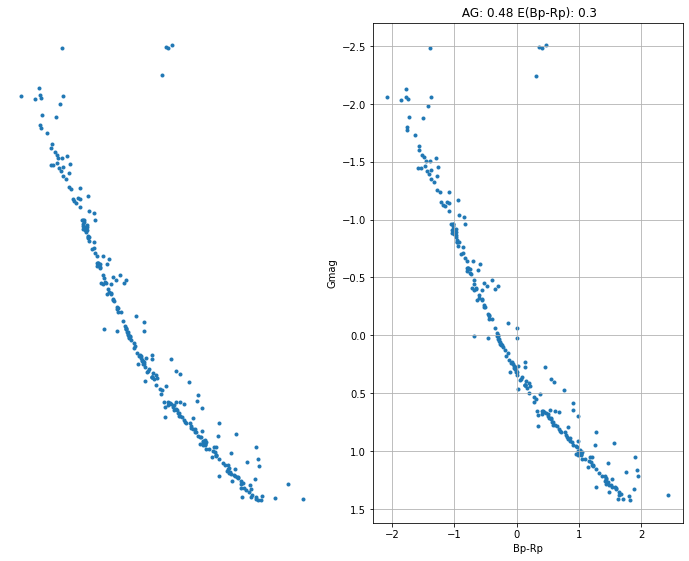

In [16]:
graficar_cumulos_y_nocumulos_estandarizado("Melotte_25")

Objetivo: 5 mil cumulos / no cumulos per shell
856 cumulos * 3 [Cumulos]= 2568
2568 * 2 = 5136 : Es necesario aplicar la graficas 2 veces por cumulo

No cumulos:
856 *2 = 1712
1712*3= 5136: Es necesario que la grafica genere 3 no cumulos

HSC_2384 Distancia Real: 0.57 Kpc


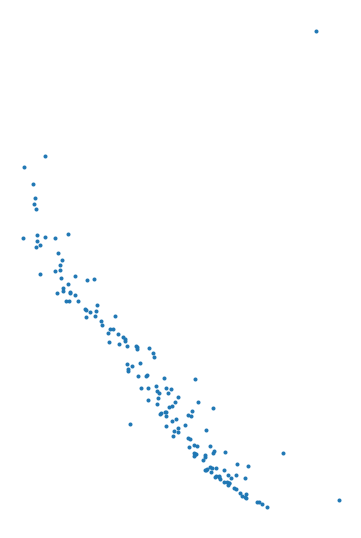

In [14]:
i=np.random.choice(nombres_cumulos)
graficar_cumulos_y_nocumulos_estandarizado(i)

In [ ]:
for i in range(200):
    cumulo=nombres_cumulos[i]
    graficar_cumulos_y_nocumulos_estandarizado(cumulo)
    i+=1

In [ ]:
for i in range(200):
    cumulo=nombres_cumulos[i+200]
    graficar_cumulos_y_nocumulos_estandarizado(cumulo)
    i+=1

In [ ]:
for i in range(200):
    cumulo=nombres_cumulos[i+400]
    graficar_cumulos_y_nocumulos_estandarizado(cumulo)
    i+=1

In [ ]:
for i in range(200):
    cumulo=nombres_cumulos[i+600]
    graficar_cumulos_y_nocumulos_estandarizado(cumulo)
    i+=1

In [ ]:
for i in range(56):
    cumulo=nombres_cumulos[i+800]
    graficar_cumulos_y_nocumulos_estandarizado(cumulo)
    i+=1

In [30]:
def boxplot(name, inf, sup):
    fig, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20, 7))
    #df1=dataframes[i]
    df = name_dataframes[name]
    rango_shell1 = np.linspace(4000, 5000, 10000)
    df1 = df.copy()
    mag_abs = df1["Gmag"] - 5 * np.log10(df1["Kpc"] * 1000) + 5
    distancia = random.choice(rango_shell1)
    df1["Gmag"] = mag_abs + 5 * np.log10(distancia) - 5
    var=np.linspace(0,0.55,1000)
    a=random.choice(var)
    df1['Gmag']=df1['Gmag']+a
    df1 = df1[df1['Gmag'] <= 21]
    
    exc=np.linspace(0,0.4,1000)
    b=random.choice(exc)
    ax2.scatter(df1["BPmag"]-df1["RPmag"]+b,df1["Gmag"],marker=".")
    ax2.set_xlim(-1,4)
    ax2.set_ylim(11,21)
    ax2.grid(True)
    ax2.set_xlabel("Bp-Rp")
    ax2.set_ylabel("Gmag")
    ax2.set_title(name+ " Extinción: "+str(round(a,2))+" , Exceso de Color: "+str(round(b,2)))
    ax2.invert_yaxis()
        
    df1= df1.dropna(subset=['Gmag'])
    data=df1['Gmag']
    median = np.median(data)
    mean = np.mean(data)
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    #hist_irc_mag["shell"+str(shell)][cua].append(iqr)
    sigma=np.std(data)
    #hist_sigma_mag["shell"+str(shell)][cua].append(sigma)
        
    ax1.boxplot(df1["Gmag"],showmeans=True, meanline=True)
    ax1.set_ylim(11,21)
    ax1.set_ylabel("Gmag")
    ax1.invert_yaxis()
    ax1.grid(True)
    ax1.set_title("Magnitud G")
        
    legend_labels = [
        f'Mean: {mean:.2f}',
        f'Median: {median:.2f}',
        f'IQR: {iqr:.2f} (Q1: {q1:.2f}, Q3: {q3:.2f})',
        f"Sigma: {sigma:2f}"
        ]

    ax1.legend(handles=[plt.Line2D([0], [0], color='green'), 
        plt.Line2D([0], [0], color='orange'), 
        plt.Line2D([0], [0], color='black'),
        plt.Line2D([0],[0],color="red")],
        labels=legend_labels, loc='upper right')
        
    df1["color"]=df1["BPmag"]-df1["RPmag"]
    df1= df1.dropna(subset=['color'])
        
    data=df1['color']
    median = np.median(data)
    mean = np.mean(data)
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
        #print(type( hist_irc_color["shell"+str(shell)][cua]))
    #hist_irc_color["shell"+str(shell)][cua].append(iqr)
    sigma=np.std(data)
    #hist_sigma_color["shell"+str(shell)][cua].append(sigma)
        
        
    ax3.boxplot(df1["color"],vert=False,showmeans=True, meanline=True)
    ax3.set_xlim(-1,4)
    ax3.set_xlabel("Bp-Rp")
    ax3.grid(True)
    ax3.set_title("Color Bp-Rp")
        
    legend_labels = [
        f'Mean: {mean:.2f}',
        f'Median: {median:.2f}',
        f'IQR: {iqr:.2f} (Q1: {q1:.2f}, Q3: {q3:.2f})',
        f"Sigma: {sigma:2f}"
        ]

    ax3.legend(handles=[plt.Line2D([0], [0], color='green'), 
        plt.Line2D([0], [0], color='orange'), 
        plt.Line2D([0], [0], color='black'),
        plt.Line2D([0],[0],color="red")],
        labels=legend_labels, loc='upper right')
    
    df2=df1.copy()
    df2 = df2[df2['Gmag'] <= sup]
    df2 = df2[df2['Gmag'] >= inf]
    df2["color"]=df2["BPmag"]-df2["RPmag"]
    df2= df2.dropna(subset=['color'])
        
    data=df2['color']
    median = np.median(data)
    mean = np.mean(data)
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    sigma=np.std(data)
        
        
    ax4.boxplot(df2["color"],vert=False,showmeans=True, meanline=True)
    ax4.set_xlim(-1,4)
    ax4.set_xlabel("Bp-Rp")
    ax4.grid(True)
    ax4.set_title("Bp-Rp , Magnitudes: "+str(round(inf,2))+" a "+str(round(sup,2)))
        
    legend_labels = [
        f'Mean: {mean:.2f}',
        f'Median: {median:.2f}',
        f'IQR: {iqr:.2f} (Q1: {q1:.2f}, Q3: {q3:.2f})',
        f"Sigma: {sigma:2f}"
        ]

    ax4.legend(handles=[plt.Line2D([0], [0], color='green'), 
        plt.Line2D([0], [0], color='orange'), 
        plt.Line2D([0], [0], color='black'),
        plt.Line2D([0],[0],color="red")],
        labels=legend_labels, loc='upper right')


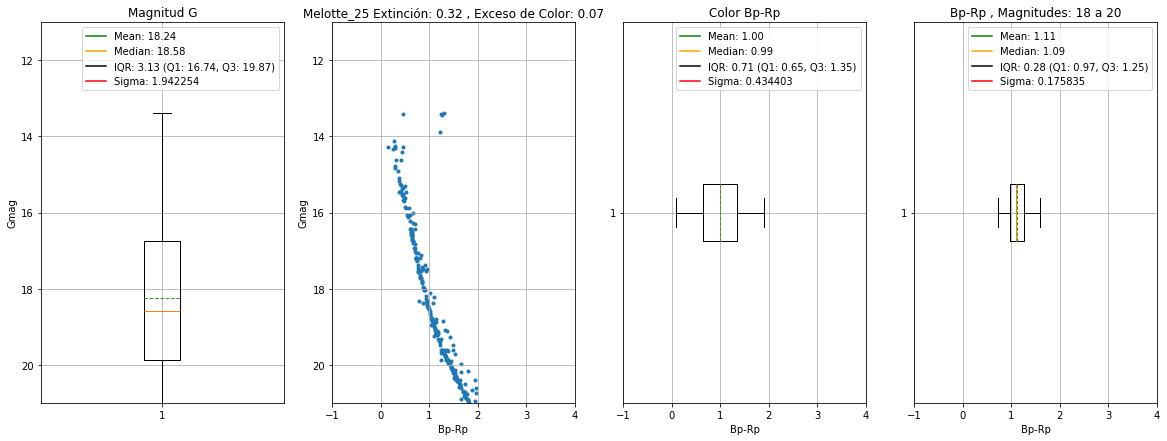

In [31]:
boxplot("Melotte_25",18,20)

In [ ]:
mags=np.linspace(14,19)
for i in range(10):
    cumulo=random.choice(nombres_cumulos)
    a=random.choice(mags)
    boxplot(cumulo,a,a+2)
    i+=1

In [19]:
cumulos_folder_shell1=r"C:\Users\juang\Documents\Tareas JD\Universidad\Materias\8 Semestre\Proyecto Teorico\Proyecto Teorico 20242\Gaia-DR3-Proyecto-Teorico-20242\muestra_entrenamiento\shell1\cumulos"
nocumulos_folder_shell1=r"C:\Users\juang\Documents\Tareas JD\Universidad\Materias\8 Semestre\Proyecto Teorico\Proyecto Teorico 20242\Gaia-DR3-Proyecto-Teorico-20242\muestra_entrenamiento\shell1\no-cumulos"

cumulos_folder_shell2=r"C:\Users\juang\Documents\Tareas JD\Universidad\Materias\8 Semestre\Proyecto Teorico\Proyecto Teorico 20242\Gaia-DR3-Proyecto-Teorico-20242\muestra_entrenamiento\shell2\cumulos"
nocumulos_folder_shell2=r"C:\Users\juang\Documents\Tareas JD\Universidad\Materias\8 Semestre\Proyecto Teorico\Proyecto Teorico 20242\Gaia-DR3-Proyecto-Teorico-20242\muestra_entrenamiento\shell2\no-cumulos"

In [17]:
def graficar_cumulos_y_nocumulos_estandarizado_guardar_muestra(nombre):
    i=0
    while i<2:
        df = name_dataframes[nombre]
        fig, ax = plt.subplots(2, 6, figsize=(30, 15))  # Create 2x4 grid of subplots
        print(nombre + " Distancia Real: " + str(round(sum(df["Kpc"]) / len(df["Kpc"]), 2)) + " Kpc")
        
        # Shell 1
        rango_shell1 = np.linspace(4000, 5000, 10000)
        df1 = df.copy()

        mag_abs = df1["Gmag"] - 5 * np.log10(df1["Kpc"] * 1000) + 5
        distancia = random.choice(rango_shell1)
        df1["Gmag"] = mag_abs + 5 * np.log10(distancia) - 5

        var = np.linspace(-0.05, 0.05, 100)
        a = random.choice(var)
        
        df1_standar=df1.copy()
        df1_standar["Gmag"] = df1["Gmag"] + 0.2 + a
        b = random.choice(var)
        # Plot 1
        df1_standar["color"]= df1["BPmag"] - df1["RPmag"] + 0.3 + b
        df1_standar["Gmag"] = df1["Gmag"]
        df1_standar = df1_standar[df1_standar["Gmag"]<=21]
        df1_standar["color"]=zs(df1_standar["color"])
        df1_standar["Gmag"]=zs(df1_standar["Gmag"])
        
        #print(list(aaaa))
        
        ax[0, 0].scatter(list(df1_standar["color"]), list(df1_standar["Gmag"]), marker=".")
        #ax[0, 0].grid(True)
        #ax[0, 0].set_xlabel("Bp-Rp")
        #ax[0, 0].set_ylabel("Gmag")
        #ax[0, 0].set_title(nombre + " Dist: " + str(round(distancia / 1000, 2)) + " Kpc " + " AG: " + str(round(0.2 + a, 2)) + " E(Bp-Rp): " + str(round(0.3 + b, 2)))
        #ax[0, 0].set_ylim(11, 21)
        #ax[0,0].set_xlim(-1,4)
        ax[0, 0].invert_yaxis()
        ax[0,0].axis('off')
        
        
        df2 = df.copy()
        mag_abs = df["Gmag"] - 5 * np.log10(df["Kpc"] * 1000) + 5
        df2["Gmag"] = mag_abs + 5 * np.log10(distancia) - 5

        a = random.choice(var)
        b = random.choice(var)
        
        df2_standar=df2.copy()
        df2_standar["Gmag"] = df2["Gmag"] + 0.2 + a
        df2_standar["color"]= df2["BPmag"] - df2["RPmag"] + 0.3 + b
        df2_standar = df2_standar[df2_standar["Gmag"]<=21]
        df2_standar["color"]=zs(df2_standar["color"])
        df2_standar["Gmag"]=zs(df2_standar["Gmag"])

        # Plot 2
        ax[0, 1].scatter(df2_standar["color"], df2_standar["Gmag"], marker=".")
        #ax[0, 1].grid(True)
        #ax[0, 1].set_xlabel("Bp-Rp")
        #ax[0, 1].set_ylabel("Gmag")
        #ax[0, 1].set_title(" AG: " + str(round(0.5 + a, 2)) + " E(Bp-Rp): " + str(round(0.3 + b, 2)))
        #ax[0, 1].set_ylim(11, 21)
        #ax[0,1].set_xlim(-1,4)
        ax[0, 1].invert_yaxis()
        ax[0,1].axis('off')
        
        df25 = df.copy()
        mag_abs = df["Gmag"] - 5 * np.log10(df["Kpc"] * 1000) + 5
        df25["Gmag"] = mag_abs + 5 * np.log10(distancia) - 5

        a = random.choice(var)
        b = random.choice(var)
        
        df25_standar=df25.copy()
        df25_standar["Gmag"] = df25["Gmag"] + 0.2 + a
        df25_standar["color"]= df25["BPmag"] - df25["RPmag"] + 0.3 + b
        df25_standar = df25_standar[df25_standar["Gmag"]<=21]
        df25_standar["color"]=zs(df25_standar["color"])
        df25_standar["Gmag"]=zs(df25_standar["Gmag"])

        # Plot 2
        ax[0, 2].scatter(df25_standar["color"], df25_standar["Gmag"], marker=".")
        #ax[0, 2].grid(True)
        #ax[0, 2].set_xlabel("Bp-Rp")
        #ax[0, 2].set_ylabel("Gmag")
        #ax[0, 2].set_title(" AG: " + str(round(0.5 + a, 2)) + " E(Bp-Rp): " + str(round(0.3 + b, 2)))
        #ax[0, 1].set_ylim(11, 21)
        #ax[0,1].set_xlim(-1,4)
        ax[0, 2].invert_yaxis()
        ax[0,2].axis('off')
        
        

        # Shell 1 non-cluster data (df3)
        df3 = df1.copy()
        var_nocumulo_mag = np.linspace(0.6, 1.2, 100)
        var_nocumulo_color = np.linspace(0.5, 1.4, 100)
        a = np.random.choice(var_nocumulo_mag)
        b = np.random.choice(var_nocumulo_color)
        ext = gaussian_in_interval(a, 0.15, 0.6, 1.2, df3["Gmag"].shape[0])
        exc_col = gaussian_in_interval(b, 0.5, 0.5, 1.4, df3["Gmag"].shape[0])
        df3["Gmag"] = df3["Gmag"] + ext

        df3_standar=df3.copy()
        df3_standar["color"]= df3["BPmag"] - df3["RPmag"] + exc_col
        df3_standar["Gmag"] = df3["Gmag"]
        df3_standar = df3_standar[df3_standar["Gmag"]<=21]
        df3_standar["color"]=zs(df3_standar["color"])
        df3_standar["Gmag"]=zs(df3_standar["Gmag"])
        # Plot 3
        ax[0, 3].scatter(df3_standar["color"], df3_standar["Gmag"], marker=".")
        #ax[0, 3].grid(True)
        #ax[0, 3].set_xlabel("Bp-Rp")
        #ax[0, 3].set_ylabel("Gmag")
        #ax[0, 3].set_title(" AG: " + str(round(a, 2)) + " E(Bp-Rp): " + str(round(b, 2)))
        #ax[0, 2].set_ylim(11, 21)
        #ax[0,2].set_xlim(-1,4)
        ax[0, 3].invert_yaxis()
        ax[0,3].axis('off')
        
        # Shell 1 non-cluster data (df3)
        df35 = df1.copy()
        var_nocumulo_mag = np.linspace(1, 2, 100)
        var_nocumulo_color = np.linspace(1, 1.5, 100)
        a = np.random.choice(var_nocumulo_mag)
        b = np.random.choice(var_nocumulo_color)
        ext = gaussian_in_interval(a, 0.15, 0.5, 3, df35["Gmag"].shape[0])
        exc_col = gaussian_in_interval(b, 0.5, 0.4, 4, df35["Gmag"].shape[0])
        df35["Gmag"] = df35["Gmag"] + ext

        df35_standar=df35.copy()
        df35_standar["color"]= df35["BPmag"] - df35["RPmag"] + exc_col
        df35_standar["Gmag"] = df35["Gmag"]
        ax[0, 4].scatter(df35_standar["color"], df35_standar["Gmag"], marker=".")
        #ax[0, 4].set_xlabel("Bp-Rp")
        #ax[0, 4].set_ylabel("Gmag")
        #ax[0, 4].set_title(" AG: " + str(rosund(a, 2)) + " E(Bp-Rp): " + str(round(b, 2)))
        #ax[0, 2].set_ylim(11, 21)
        #ax[0,2].set_xlim(-1,4)
        ax[0, 4].invert_yaxis()
        ax[0,4].axis('off')

        # Plot 4
        df4 = df1.copy()
        var_nocumulo_mag = np.linspace(1.2, 2.5, 100)
        var_nocumulo_color = np.linspace(1.4, 2, 100)
        a = np.random.choice(var_nocumulo_mag)
        b = np.random.choice(var_nocumulo_color)

        #ext = np.random.normal(a, 0.5, df4["Gmag"].shape)
        #exc_col = np.random.normal(b, 0.5, df4["Gmag"].shape)
        ext = gaussian_in_interval(a, 0.5, 1, 5, df3["Gmag"].shape[0])
        exc_col = gaussian_in_interval(b, 1, 1, 10, df3["Gmag"].shape[0])
        df4["Gmag"] = df4["Gmag"] + ext
        
        df4_standar=df4.copy()
        df4_standar["color"]= df4["BPmag"] - df4["RPmag"] + exc_col
        df4_standar["Gmag"] = df4["Gmag"]
        df4_standar = df4_standar[df4_standar["Gmag"]<=21]
        df4_standar["color"]=zs(df4_standar["color"])
        df4_standar["Gmag"]=zs(df4_standar["Gmag"])

        ax[0, 5].scatter(df4_standar["color"], df4_standar["Gmag"], marker=".")
        #ax[0, 5].grid(True)
        #ax[0, 5].set_xlabel("Bp-Rp")
        #ax[0, 5].set_ylabel("Gmag")
        #ax[0, 5].set_title(" AG: " + str(round(a, 2)) + " E(Bp-Rp): " + str(round(b, 2)))
        #ax[0, 3].set_ylim(11, 21)
        #ax[0,3].set_xlim(-1,4)
        ax[0, 5].invert_yaxis()
        ax[0,5].axis('off')

        # Shell 2
        rango_shell2 = np.linspace(5000, 6000, 10000)
        df5 = df.copy()

        mag_abs = df5["Gmag"] - 5 * np.log10(df5["Kpc"] * 1000) + 5
        distancia = random.choice(rango_shell2)
        df5["Gmag"] = mag_abs + 5 * np.log10(distancia) - 5

        a = random.choice(var)
        b = random.choice(var)

        df5_standar=df5.copy()
        df5_standar["color"]= df5["BPmag"] - df5["RPmag"] + 0.3+b
        df5_standar["Gmag"] = df5["Gmag"] + 0.2 +a
        df5_standar = df5_standar[df5_standar["Gmag"]<=21]
        df5_standar["color"]=zs(df5_standar["color"])
        df5_standar["Gmag"]=zs(df5_standar["Gmag"])
        
        # Plot 5
        ax[1, 0].scatter(df5_standar["color"], df5_standar["Gmag"], marker=".")
        #ax[1, 0].grid(True)
        #ax[1, 0].set_xlabel("Bp-Rp")
        #ax[1, 0].set_ylabel("Gmag")
        #ax[1, 0].set_title(nombre + " Dist: " + str(round(distancia / 1000, 2)) + " Kpc " + " AG: " + str(round(0.2 + a, 2)) + " E(Bp-Rp): " + str(round(0.3 + b, 2)))
        #ax[1, 0].set_ylim(None, 21)
        ax[1, 0].invert_yaxis()
        ax[1,0].axis('off')

        df6 = df.copy()
        mag_abs = df["Gmag"] - 5 * np.log10(df["Kpc"] * 1000) + 5
        df6["Gmag"] = mag_abs + 5 * np.log10(distancia) - 5

        a = random.choice(var)
        b = random.choice(var)
        
        df6_standar=df6.copy()
        df6_standar["color"]= df6["BPmag"] - df6["RPmag"] + 0.3+b
        df6_standar["Gmag"] = df6["Gmag"] + 0.5 +a
        df6_standar = df6_standar[df6_standar["Gmag"]<=21]
        df6_standar["color"]=zs(df6_standar["color"])
        df6_standar["Gmag"]=zs(df6_standar["Gmag"])

        # Plot 6
        ax[1, 1].scatter(df6_standar["color"], df6_standar["Gmag"], marker=".")
        #ax[1, 1].grid(True)
        #ax[1, 1].set_xlabel("Bp-Rp")
        #ax[1, 1].set_ylabel("Gmag")
        #ax[1, 1].set_title(" AG: " + str(round(0.5 + a, 2)) + " E(Bp-Rp): " + str(round(0.3 + b, 2)))
        #ax[1, 1].set_ylim(11, 21)
        #ax[1,1].set_xlim(-1,4)
        ax[1, 1].invert_yaxis()
        ax[1,1].axis('off')
        
        df65 = df.copy()
        mag_abs = df["Gmag"] - 5 * np.log10(df["Kpc"] * 1000) + 5
        df65["Gmag"] = mag_abs + 5 * np.log10(distancia) - 5

        a = random.choice(var)
        b = random.choice(var)
        
        df65_standar=df65.copy()
        df65_standar["Gmag"] = df65["Gmag"] + 0.2 + a
        df65_standar["color"]= df65["BPmag"] - df65["RPmag"] + 0.3 + b
        df65_standar = df65_standar[df65_standar["Gmag"]<=21]
        df65_standar["color"]=zs(df65_standar["color"])
        df65_standar["Gmag"]=zs(df65_standar["Gmag"])

        # Plot 2
        ax[1, 2].scatter(df65_standar["color"], df65_standar["Gmag"], marker=".")
        #ax[1, 2].grid(True)
        #ax[1, 2].set_xlabel("Bp-Rp")
        #ax[1, 2].set_ylabel("Gmag")
        #ax[1, 2].set_title(" AG: " + str(round(0.5 + a, 2)) + " E(Bp-Rp): " + str(round(0.3 + b, 2)))
        #ax[0, 1].set_ylim(11, 21)
        #ax[0,1].set_xlim(-1,4)
        ax[1, 2].invert_yaxis()
        ax[1,2].axis('off')

        # Shell 2 non-cluster data (df7)
        df7 = df5.copy()
        var_nocumulo_mag = np.linspace(0.6, 1.2, 100)
        var_nocumulo_color = np.linspace(0.5, 1.4, 100)
        a = np.random.choice(var_nocumulo_mag)
        b = np.random.choice(var_nocumulo_color)
        ext = gaussian_in_interval(a, 0.15, 0.6, 1.2, df7["Gmag"].shape[0])
        exc_col = gaussian_in_interval(b, 0.5, 0.5, 1.4, df7["Gmag"].shape[0])
        df7["Gmag"] = df7["Gmag"] + ext

        df7_standar=df7.copy()
        df7_standar["color"]= df7["BPmag"] - df7["RPmag"] + exc_col
        df7_standar["Gmag"] = df7["Gmag"]
        df7_standar = df7_standar[df7_standar["Gmag"]<=21]
        df7_standar["color"]=zs(df7_standar["color"])
        df7_standar["Gmag"]=zs(df7_standar["Gmag"])
        
        # Plot 7
        ax[1, 3].scatter(df7_standar["color"], df7_standar["Gmag"], marker=".")
        #ax[1, 3].grid(True)
        #ax[1, 3].set_xlabel("Bp-Rp")
        #ax[1, 3].set_ylabel("Gmag")
        #ax[1, 3].set_title(" AG: " + str(round(a, 2)) + " E(Bp-Rp): " + str(round(b, 2)))
        #ax[1, 2].set_ylim(11, 21)
        #ax[1,2].set_xlim(-1,4)
        ax[1, 3].invert_yaxis()
        ax[1,3].axis('off')
        
        df75 = df5.copy()
        var_nocumulo_mag = np.linspace(1, 2, 100)
        var_nocumulo_color = np.linspace(1, 1.5, 100)
        a = np.random.choice(var_nocumulo_mag)
        b = np.random.choice(var_nocumulo_color)
        ext = gaussian_in_interval(a, 0.15, 0.5, 3, df35["Gmag"].shape[0])
        exc_col = gaussian_in_interval(b, 0.5, 0.4, 4, df35["Gmag"].shape[0])
        df75["Gmag"] = df75["Gmag"] + ext

        df75_standar=df75.copy()
        df75_standar["color"]= df75["BPmag"] - df75["RPmag"] + exc_col
        df75_standar["Gmag"] = df35["Gmag"]
        df75_standar = df75_standar[df75_standar["Gmag"]<=21]
        df75_standar["color"]=zs(df75_standar["color"])
        df75_standar["Gmag"]=zs(df75_standar["Gmag"])
        # Plot 3
        ax[1, 4].scatter(df75_standar["color"], df75_standar["Gmag"], marker=".")
        #ax[1, 4].grid(True)
        #ax[1, 4].set_xlabel("Bp-Rp")
        #ax[1, 4].set_ylabel("Gmag")
        #ax[1, 4].set_title(" AG: " + str(round(a, 2)) + " E(Bp-Rp): " + str(round(b, 2)))
        #ax[0, 2].set_ylim(11, 21)
        #ax[0,2].set_xlim(-1,4)
        ax[1, 4].invert_yaxis()
        ax[1,4].axis('off')

        # Plot 8
        df8 = df5.copy()
        var_nocumulo_mag = np.linspace(1.2, 2.5, 100)
        var_nocumulo_color = np.linspace(1.4, 2, 100)
        a = np.random.choice(var_nocumulo_mag)
        b = np.random.choice(var_nocumulo_color)

        #ext = np.random.normal(a, 0.5, df8["Gmag"].shape)
        #exc_col = np.random.normal(b, 0.5, df8["Gmag"].shape)
        ext = gaussian_in_interval(a, 0.5, 1, 5, df3["Gmag"].shape[0])
        exc_col = gaussian_in_interval(b, 1, 1, 10, df3["Gmag"].shape[0])
        df8["Gmag"] = df8["Gmag"] + ext

        df8_standar=df8.copy()
        df8_standar["color"]= df8["BPmag"] - df8["RPmag"] + exc_col
        df8_standar["Gmag"] = df8["Gmag"]
        df8_standar = df8_standar[df8_standar["Gmag"]<=21]
        df8_standar["color"]=zs(df8_standar["color"])
        df8_standar["Gmag"]=zs(df8_standar["Gmag"])
        
        ax[1, 5].scatter(df8_standar["color"], df8_standar["Gmag"], marker=".")
        #ax[1, 5].grid(True)
        #ax[1, 5].set_xlabel("Bp-Rp")
        #ax[1, 5].set_ylabel("Gmag")
        #ax[1, 5].set_title(" AG: " + str(round(a, 2)) + " E(Bp-Rp): " + str(round(b, 2)))
        #ax[1, 3].set_ylim(11, 21)
        #ax[1,3].set_xlim(-1,4)
        ax[1, 5].invert_yaxis()
        ax[1,5].axis('off')

        #plt.tight_layout()
        
        #SECCION PARA GUARDAR IMAGENES
        
        
        #cumulos_folder=r"C:\Users\juang\Documents\Tareas JD\Universidad\Materias\8 Semestre\Proyecto Teorico\Proyecto Teorico 20242\Gaia-DR3-Proyecto-Teorico-20242\muestra_entrenamiento\cumulos"
        #nocumulos_folder=r"C:\Users\juang\Documents\Tareas JD\Universidad\Materias\8 Semestre\Proyecto Teorico\Proyecto Teorico 20242\Gaia-DR3-Proyecto-Teorico-20242\muestra_entrenamiento\no_cumulos"
        cumulos_1 = cumulos_folder_shell1
        no_cumulos_1 = nocumulos_folder_shell1
        
        cumulos_2 = cumulos_folder_shell2
        no_cumulos_2 = nocumulos_folder_shell2
        
        # # Create folders if they do not exist
        # if not os.path.exists(cumulos_1):
        #     os.makedirs(cumulos_1)
        # if not os.path.exists(no_cumulos_1):
        #     os.makedirs(no_cumulos_1)

        # if not os.path.exists(cumulos_2):
        #     os.makedirs(cumulos_2)
        # if not os.path.exists(no_cumulos_2):
        #     os.makedirs(no_cumulos_2)
            

        
        ax[0,0].set_visible(False)
        ax[0,1].set_visible(False)
        ax[0,2].set_visible(False)
        ax[0,3].set_visible(False)
        ax[0,4].set_visible(False)
        ax[0,5].set_visible(False)
        ax[1,0].set_visible(False)
        ax[1,1].set_visible(False)
        ax[1,2].set_visible(False)
        ax[1,3].set_visible(False)
        ax[1,4].set_visible(False)
        ax[1,5].set_visible(False)
        #Imagen 1
        ax[0,0].set_visible(True)
        output_path = os.path.join(cumulos_1, nombre+str(i)+'_1.png')
        fig.savefig(output_path,bbox_inches="tight")
        ax[0,0].set_visible(False)
        
        #imagen 2
        ax[0,1].set_visible(True)
        output_path = os.path.join(cumulos_1, nombre+str(i)+'_2.png')
        fig.savefig(output_path,bbox_inches="tight")
        ax[0,1].set_visible(False)
        
        #imagen 3
        ax[0,2].set_visible(True)
        output_path = os.path.join(cumulos_1, nombre+str(i)+'_3.png')
        fig.savefig(output_path,bbox_inches="tight")
        ax[0,2].set_visible(False)
        
        #imagen 4
        ax[0,3].set_visible(True)
        output_path = os.path.join(no_cumulos_1, nombre+str(i)+'_4.png')
        fig.savefig(output_path,bbox_inches="tight")
        ax[0,3].set_visible(False)
        
        #imagen 5
        ax[0,4].set_visible(True)
        output_path = os.path.join(no_cumulos_1, nombre+str(i)+'_5.png')
        fig.savefig(output_path,bbox_inches="tight")
        ax[0,4].set_visible(False)
        
        #imagen 6
        ax[0,5].set_visible(True)
        output_path = os.path.join(no_cumulos_1, nombre+str(i)+'_6.png')
        fig.savefig(output_path,bbox_inches="tight")
        ax[0,5].set_visible(False)
        
        #imagen 7
        ax[1,0].set_visible(True)
        output_path = os.path.join(cumulos_2, nombre+str(i)+'_7.png')
        fig.savefig(output_path,bbox_inches="tight")
        ax[1,0].set_visible(False)
        
        #imagen 8
        ax[1,1].set_visible(True)
        output_path = os.path.join(cumulos_2, nombre+str(i)+'_8.png')
        fig.savefig(output_path,bbox_inches="tight")
        ax[1,1].set_visible(False)
        
        #imagen 9
        ax[1,2].set_visible(True)
        output_path = os.path.join(cumulos_2, nombre+str(i)+'_9.png')
        fig.savefig(output_path,bbox_inches="tight")
        ax[1,2].set_visible(False)
        
        #imagen 10
        ax[1,3].set_visible(True)
        output_path = os.path.join(no_cumulos_2, nombre+str(i)+'_10.png')
        fig.savefig(output_path,bbox_inches="tight")
        ax[1,3].set_visible(False)
        
        #imagen 11
        ax[1,4].set_visible(True)
        output_path = os.path.join(no_cumulos_2, nombre+str(i)+'_11.png')
        fig.savefig(output_path,bbox_inches="tight")
        ax[1,4].set_visible(False)
        
        #imagen 12
        ax[1,5].set_visible(True)
        output_path = os.path.join(no_cumulos_2, nombre+str(i)+'_12.png')
        fig.savefig(output_path,bbox_inches="tight")
        ax[1,5].set_visible(False)
        
        ax[0,0].set_visible(True)
        ax[0,1].set_visible(True)
        ax[0,2].set_visible(True)
        ax[0,3].set_visible(True)
        ax[0,4].set_visible(True)
        ax[0,5].set_visible(True)
        ax[1,0].set_visible(True)
        ax[1,1].set_visible(True)
        ax[1,2].set_visible(True)
        ax[1,3].set_visible(True)
        ax[1,4].set_visible(True)
        ax[1,5].set_visible(True)
        plt.show()
        i+=1

In [ ]:
graficar_cumulos_y_nocumulos_estandarizado_guardar_muestra("Alessi_37")

In [ ]:
for i in range(400):
    cumulo=nombres_cumulos[i]
    graficar_cumulos_y_nocumulos_estandarizado_guardar_muestra(cumulo)
    i+=1

In [ ]:
for i in range(400):
    cumulo=nombres_cumulos[i+400]
    graficar_cumulos_y_nocumulos_estandarizado_guardar_muestra(cumulo)
    i+=1

In [ ]:
for i in range(56):
    cumulo=nombres_cumulos[i+800]
    graficar_cumulos_y_nocumulos_estandarizado_guardar_muestra(cumulo)
    i+=1

In [20]:
def graficar_cumulos_y_nocumulos_estandarizado_Noguardar_muestra(nombre):
        df = name_dataframes[nombre]
        fig, ax = plt.subplots(2, 6, figsize=(30, 15))  # Create 2x4 grid of subplots
        print(nombre + " Distancia Real: " + str(round(sum(df["Kpc"]) / len(df["Kpc"]), 2)) + " Kpc")
        
        # Shell 1
        rango_shell1 = np.linspace(4000, 5000, 10000)
        df1 = df.copy()

        mag_abs = df1["Gmag"] - 5 * np.log10(df1["Kpc"] * 1000) + 5
        distancia = random.choice(rango_shell1)
        df1["Gmag"] = mag_abs + 5 * np.log10(distancia) - 5

        var = np.linspace(-0.05, 0.05, 100)
        a = random.choice(var)
        
        df1_standar=df1.copy()
        df1_standar["Gmag"] = df1["Gmag"] + 0.2 + a
        b = random.choice(var)
        # Plot 1
        df1_standar["color"]= df1["BPmag"] - df1["RPmag"] + 0.3 + b
        df1_standar["Gmag"] = df1["Gmag"]
        df1_standar = df1_standar[df1_standar["Gmag"]<=21]
        df1_standar["color"]=zs(df1_standar["color"])
        df1_standar["Gmag"]=zs(df1_standar["Gmag"])
        
        #print(list(aaaa))
        
        ax[0, 0].scatter(list(df1_standar["color"]), list(df1_standar["Gmag"]), marker=".")
        ax[0, 0].grid(True)
        ax[0, 0].set_xlabel("Bp-Rp")
        ax[0, 0].set_ylabel("Gmag")
        ax[0, 0].set_title(nombre + " Dist: " + str(round(distancia / 1000, 2)) + " Kpc " + " AG: " + str(round(0.2 + a, 2)) + " E(Bp-Rp): " + str(round(0.3 + b, 2)))
        #ax[0, 0].set_ylim(11, 21)
        #ax[0,0].set_xlim(-1,4)
        ax[0, 0].invert_yaxis()
        #ax[0,0].axis('off')
        
        
        df2 = df.copy()
        mag_abs = df["Gmag"] - 5 * np.log10(df["Kpc"] * 1000) + 5
        df2["Gmag"] = mag_abs + 5 * np.log10(distancia) - 5

        a = random.choice(var)
        b = random.choice(var)
        
        df2_standar=df2.copy()
        df2_standar["Gmag"] = df2["Gmag"] + 0.2 + a
        df2_standar["color"]= df2["BPmag"] - df2["RPmag"] + 0.3 + b
        df2_standar = df2_standar[df2_standar["Gmag"]<=21]
        df2_standar["color"]=zs(df2_standar["color"])
        df2_standar["Gmag"]=zs(df2_standar["Gmag"])

        # Plot 2
        ax[0, 1].scatter(df2_standar["color"], df2_standar["Gmag"], marker=".")
        ax[0, 1].grid(True)
        ax[0, 1].set_xlabel("Bp-Rp")
        ax[0, 1].set_ylabel("Gmag")
        ax[0, 1].set_title(" AG: " + str(round(0.5 + a, 2)) + " E(Bp-Rp): " + str(round(0.3 + b, 2)))
        #ax[0, 1].set_ylim(11, 21)
        #ax[0,1].set_xlim(-1,4)
        ax[0, 1].invert_yaxis()
        #ax[0,1].axis('off')
        
        df25 = df.copy()
        mag_abs = df["Gmag"] - 5 * np.log10(df["Kpc"] * 1000) + 5
        df25["Gmag"] = mag_abs + 5 * np.log10(distancia) - 5

        a = random.choice(var)
        b = random.choice(var)
        
        df25_standar=df25.copy()
        df25_standar["Gmag"] = df25["Gmag"] + 0.2 + a
        df25_standar["color"]= df25["BPmag"] - df25["RPmag"] + 0.3 + b
        df25_standar = df25_standar[df25_standar["Gmag"]<=21]
        df25_standar["color"]=zs(df25_standar["color"])
        df25_standar["Gmag"]=zs(df25_standar["Gmag"])

        # Plot 2
        ax[0, 2].scatter(df25_standar["color"], df25_standar["Gmag"], marker=".")
        ax[0, 2].grid(True)
        ax[0, 2].set_xlabel("Bp-Rp")
        ax[0, 2].set_ylabel("Gmag")
        ax[0, 2].set_title(" AG: " + str(round(0.5 + a, 2)) + " E(Bp-Rp): " + str(round(0.3 + b, 2)))
        #ax[0, 1].set_ylim(11, 21)
        #ax[0,1].set_xlim(-1,4)
        ax[0, 2].invert_yaxis()
        #ax[0,2].axis('off')
        
        

        # Shell 1 non-cluster data (df3)
        df3 = df1.copy()
        var_nocumulo_mag = np.linspace(0.6, 1.2, 100)
        var_nocumulo_color = np.linspace(0.5, 1.4, 100)
        a = np.random.choice(var_nocumulo_mag)
        b = np.random.choice(var_nocumulo_color)
        ext = gaussian_in_interval(a, 0.15, 0.6, 1.2, df3["Gmag"].shape[0])
        exc_col = gaussian_in_interval(b, 0.5, 0.5, 1.4, df3["Gmag"].shape[0])
        df3["Gmag"] = df3["Gmag"] + ext

        df3_standar=df3.copy()
        df3_standar["color"]= df3["BPmag"] - df3["RPmag"] + exc_col
        df3_standar["Gmag"] = df3["Gmag"]
        df3_standar = df3_standar[df3_standar["Gmag"]<=21]
        df3_standar["color"]=zs(df3_standar["color"])
        df3_standar["Gmag"]=zs(df3_standar["Gmag"])
        # Plot 3
        ax[0, 3].scatter(df3_standar["color"], df3_standar["Gmag"], marker=".")
        ax[0, 3].grid(True)
        ax[0, 3].set_xlabel("Bp-Rp")
        ax[0, 3].set_ylabel("Gmag")
        ax[0, 3].set_title(" AG: " + str(round(a, 2)) + " E(Bp-Rp): " + str(round(b, 2)))
        #ax[0, 2].set_ylim(11, 21)
        #ax[0,2].set_xlim(-1,4)
        ax[0, 3].invert_yaxis()
        #ax[0,3].axis('off')
        
        # Shell 1 non-cluster data (df3)
        df35 = df1.copy()
        var_nocumulo_mag = np.linspace(1, 2, 100)
        var_nocumulo_color = np.linspace(1, 1.5, 100)
        a = np.random.choice(var_nocumulo_mag)
        b = np.random.choice(var_nocumulo_color)
        ext = gaussian_in_interval(a, 0.15, 0.5, 3, df35["Gmag"].shape[0])
        exc_col = gaussian_in_interval(b, 0.5, 0.4, 4, df35["Gmag"].shape[0])
        df35["Gmag"] = df35["Gmag"] + ext

        df35_standar=df35.copy()
        df35_standar["color"]= df35["BPmag"] - df35["RPmag"] + exc_col
        df35_standar["Gmag"] = df35["Gmag"]
        df35_standar["color"]=zs(df35_standar["color"])
        df35_standar["Gmag"]=zs(df35_standar["Gmag"])
        ax[0, 4].scatter(df35_standar["color"], df35_standar["Gmag"], marker=".")
        ax[0, 4].set_xlabel("Bp-Rp")
        ax[0, 4].set_ylabel("Gmag")
        ax[0, 4].set_title(" AG: " + str(round(a, 2)) + " E(Bp-Rp): " + str(round(b, 2)))
        #ax[0, 2].set_ylim(11, 21)
        #ax[0,2].set_xlim(-1,4)
        ax[0, 4].invert_yaxis()
        #ax[0,4].axis('off')
        ax[0,4].grid(True)

        # Plot 4
        df4 = df1.copy()
        var_nocumulo_mag = np.linspace(1.2, 2.5, 100)
        var_nocumulo_color = np.linspace(1.4, 2, 100)
        a = np.random.choice(var_nocumulo_mag)
        b = np.random.choice(var_nocumulo_color)

        #ext = np.random.normal(a, 0.5, df4["Gmag"].shape)
        #exc_col = np.random.normal(b, 0.5, df4["Gmag"].shape)
        ext = gaussian_in_interval(a, 0.5, 1, 5, df3["Gmag"].shape[0])
        exc_col = gaussian_in_interval(b, 1, 1, 10, df3["Gmag"].shape[0])
        df4["Gmag"] = df4["Gmag"] + ext
        
        df4_standar=df4.copy()
        df4_standar["color"]= df4["BPmag"] - df4["RPmag"] + exc_col
        df4_standar["Gmag"] = df4["Gmag"]
        df4_standar = df4_standar[df4_standar["Gmag"]<=21]
        df4_standar["color"]=zs(df4_standar["color"])
        df4_standar["Gmag"]=zs(df4_standar["Gmag"])

        ax[0, 5].scatter(df4_standar["color"], df4_standar["Gmag"], marker=".")
        ax[0, 5].grid(True)
        ax[0, 5].set_xlabel("Bp-Rp")
        ax[0, 5].set_ylabel("Gmag")
        ax[0, 5].set_title(" AG: " + str(round(a, 2)) + " E(Bp-Rp): " + str(round(b, 2)))
        #ax[0, 3].set_ylim(11, 21)
        #ax[0,3].set_xlim(-1,4)
        ax[0, 5].invert_yaxis()
        #ax[0,5].axis('off')

        # Shell 2
        rango_shell2 = np.linspace(5000, 6000, 10000)
        df5 = df.copy()

        mag_abs = df5["Gmag"] - 5 * np.log10(df5["Kpc"] * 1000) + 5
        distancia = random.choice(rango_shell2)
        df5["Gmag"] = mag_abs + 5 * np.log10(distancia) - 5

        a = random.choice(var)
        b = random.choice(var)

        df5_standar=df5.copy()
        df5_standar["color"]= df5["BPmag"] - df5["RPmag"] + 0.3+b
        df5_standar["Gmag"] = df5["Gmag"] + 0.2 +a
        df5_standar = df5_standar[df5_standar["Gmag"]<=21]
        df5_standar["color"]=zs(df5_standar["color"])
        df5_standar["Gmag"]=zs(df5_standar["Gmag"])
        
        # Plot 5
        ax[1, 0].scatter(df5_standar["color"], df5_standar["Gmag"], marker=".")
        ax[1, 0].grid(True)
        ax[1, 0].set_xlabel("Bp-Rp")
        ax[1, 0].set_ylabel("Gmag")
        ax[1, 0].set_title(nombre + " Dist: " + str(round(distancia / 1000, 2)) + " Kpc " + " AG: " + str(round(0.2 + a, 2)) + " E(Bp-Rp): " + str(round(0.3 + b, 2)))
        #ax[1, 0].set_ylim(None, 21)
        ax[1, 0].invert_yaxis()
        #ax[1,0].axis('off')

        df6 = df.copy()
        mag_abs = df["Gmag"] - 5 * np.log10(df["Kpc"] * 1000) + 5
        df6["Gmag"] = mag_abs + 5 * np.log10(distancia) - 5

        a = random.choice(var)
        b = random.choice(var)
        
        df6_standar=df6.copy()
        df6_standar["color"]= df6["BPmag"] - df6["RPmag"] + 0.3+b
        df6_standar["Gmag"] = df6["Gmag"] + 0.5 +a
        df6_standar = df6_standar[df6_standar["Gmag"]<=21]
        df6_standar["color"]=zs(df6_standar["color"])
        df6_standar["Gmag"]=zs(df6_standar["Gmag"])

        # Plot 6
        ax[1, 1].scatter(df6_standar["color"], df6_standar["Gmag"], marker=".")
        ax[1, 1].grid(True)
        ax[1, 1].set_xlabel("Bp-Rp")
        ax[1, 1].set_ylabel("Gmag")
        ax[1, 1].set_title(" AG: " + str(round(0.5 + a, 2)) + " E(Bp-Rp): " + str(round(0.3 + b, 2)))
        #ax[1, 1].set_ylim(11, 21)
        #ax[1,1].set_xlim(-1,4)
        ax[1, 1].invert_yaxis()
        #ax[1,1].axis('off')
        
        df65 = df.copy()
        mag_abs = df["Gmag"] - 5 * np.log10(df["Kpc"] * 1000) + 5
        df65["Gmag"] = mag_abs + 5 * np.log10(distancia) - 5

        a = random.choice(var)
        b = random.choice(var)
        
        df65_standar=df65.copy()
        df65_standar["Gmag"] = df65["Gmag"] + 0.2 + a
        df65_standar["color"]= df65["BPmag"] - df65["RPmag"] + 0.3 + b
        df65_standar = df65_standar[df65_standar["Gmag"]<=21]
        df65_standar["color"]=zs(df65_standar["color"])
        df65_standar["Gmag"]=zs(df65_standar["Gmag"])

        # Plot 2
        ax[1, 2].scatter(df65_standar["color"], df65_standar["Gmag"], marker=".")
        ax[1, 2].grid(True)
        ax[1, 2].set_xlabel("Bp-Rp")
        ax[1, 2].set_ylabel("Gmag")
        ax[1, 2].set_title(" AG: " + str(round(0.5 + a, 2)) + " E(Bp-Rp): " + str(round(0.3 + b, 2)))
        #ax[0, 1].set_ylim(11, 21)
        #ax[0,1].set_xlim(-1,4)
        ax[1, 2].invert_yaxis()
        #ax[1,2].axis('off')

        # Shell 2 non-cluster data (df7)
        df7 = df5.copy()
        var_nocumulo_mag = np.linspace(0.6, 1.2, 100)
        var_nocumulo_color = np.linspace(0.5, 1.4, 100)
        a = np.random.choice(var_nocumulo_mag)
        b = np.random.choice(var_nocumulo_color)
        ext = gaussian_in_interval(a, 0.15, 0.6, 1.2, df7["Gmag"].shape[0])
        exc_col = gaussian_in_interval(b, 0.5, 0.5, 1.4, df7["Gmag"].shape[0])
        df7["Gmag"] = df7["Gmag"] + ext

        df7_standar=df7.copy()
        df7_standar["color"]= df7["BPmag"] - df7["RPmag"] + exc_col
        df7_standar["Gmag"] = df7["Gmag"]
        df7_standar = df7_standar[df7_standar["Gmag"]<=21]
        df7_standar["color"]=zs(df7_standar["color"])
        df7_standar["Gmag"]=zs(df7_standar["Gmag"])
        
        # Plot 7
        ax[1, 3].scatter(df7_standar["color"], df7_standar["Gmag"], marker=".")
        ax[1, 3].grid(True)
        ax[1, 3].set_xlabel("Bp-Rp")
        ax[1, 3].set_ylabel("Gmag")
        ax[1, 3].set_title(" AG: " + str(round(a, 2)) + " E(Bp-Rp): " + str(round(b, 2)))
        #ax[1, 2].set_ylim(11, 21)
        #ax[1,2].set_xlim(-1,4)
        ax[1, 3].invert_yaxis()
        #ax[1,3].axis('off')
        
        df75 = df5.copy()
        var_nocumulo_mag = np.linspace(1, 2, 100)
        var_nocumulo_color = np.linspace(1, 1.5, 100)
        a = np.random.choice(var_nocumulo_mag)
        b = np.random.choice(var_nocumulo_color)
        ext = gaussian_in_interval(a, 0.15, 0.5, 3, df35["Gmag"].shape[0])
        exc_col = gaussian_in_interval(b, 0.5, 0.4, 4, df35["Gmag"].shape[0])
        df75["Gmag"] = df75["Gmag"] + ext

        df75_standar=df75.copy()
        df75_standar["color"]= df75["BPmag"] - df75["RPmag"] + exc_col
        df75_standar["Gmag"] = df35["Gmag"]
        df75_standar = df75_standar[df75_standar["Gmag"]<=21]
        df75_standar["color"]=zs(df75_standar["color"])
        df75_standar["Gmag"]=zs(df75_standar["Gmag"])
        # Plot 3
        ax[1, 4].scatter(df75_standar["color"], df75_standar["Gmag"], marker=".")
        ax[1, 4].grid(True)
        ax[1, 4].set_xlabel("Bp-Rp")
        ax[1, 4].set_ylabel("Gmag")
        ax[1, 4].set_title(" AG: " + str(round(a, 2)) + " E(Bp-Rp): " + str(round(b, 2)))
        #ax[0, 2].set_ylim(11, 21)
        #ax[0,2].set_xlim(-1,4)
        ax[1, 4].invert_yaxis()
        #ax[1,4].axis('off')

        # Plot 8
        df8 = df5.copy()
        var_nocumulo_mag = np.linspace(1.2, 2.5, 100)
        var_nocumulo_color = np.linspace(1.4, 2, 100)
        a = np.random.choice(var_nocumulo_mag)
        b = np.random.choice(var_nocumulo_color)

        #ext = np.random.normal(a, 0.5, df8["Gmag"].shape)
        #exc_col = np.random.normal(b, 0.5, df8["Gmag"].shape)
        ext = gaussian_in_interval(a, 0.5, 1, 5, df3["Gmag"].shape[0])
        exc_col = gaussian_in_interval(b, 1, 1, 10, df3["Gmag"].shape[0])
        df8["Gmag"] = df8["Gmag"] + ext

        df8_standar=df8.copy()
        df8_standar["color"]= df8["BPmag"] - df8["RPmag"] + exc_col
        df8_standar["Gmag"] = df8["Gmag"]
        df8_standar = df8_standar[df8_standar["Gmag"]<=21]
        df8_standar["color"]=zs(df8_standar["color"])
        df8_standar["Gmag"]=zs(df8_standar["Gmag"])
        
        ax[1, 5].scatter(df8_standar["color"], df8_standar["Gmag"], marker=".")
        ax[1, 5].grid(True)
        ax[1, 5].set_xlabel("Bp-Rp")
        ax[1, 5].set_ylabel("Gmag")
        ax[1, 5].set_title(" AG: " + str(round(a, 2)) + " E(Bp-Rp): " + str(round(b, 2)))
        #ax[1, 3].set_ylim(11, 21)
        #ax[1,3].set_xlim(-1,4)
        ax[1, 5].invert_yaxis()
        #ax[1,5].axis('off')
        plt.show()
        #plt.tight_layout()
        
        
        
        

NGC_6475 Distancia Real: 0.28 Kpc


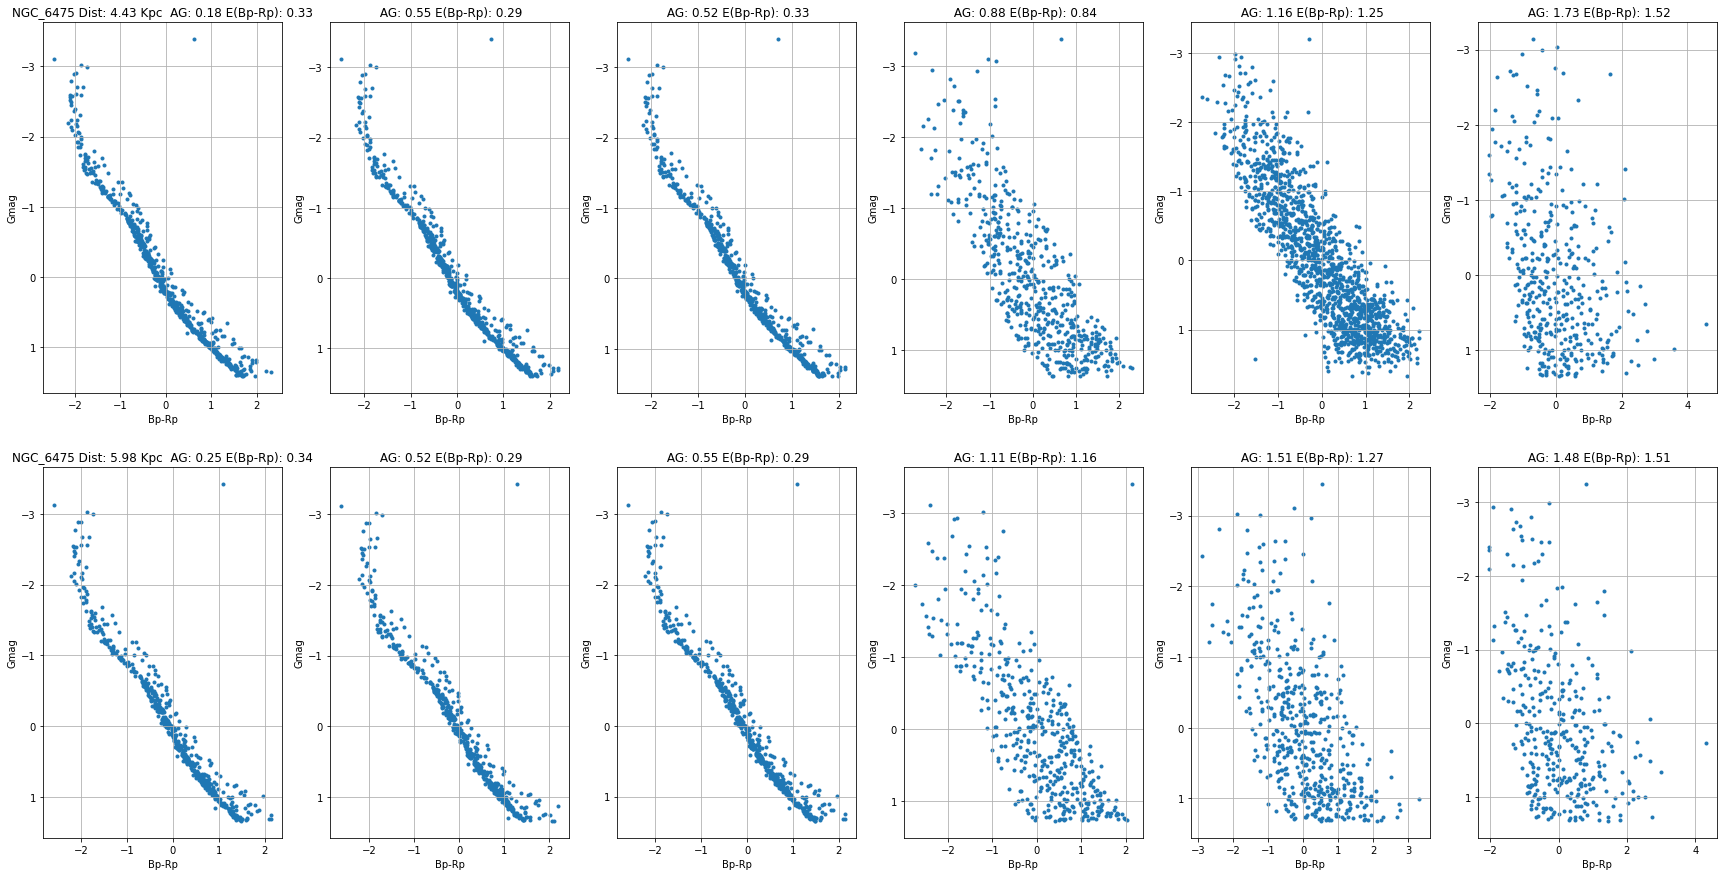

In [22]:
graficar_cumulos_y_nocumulos_estandarizado_Noguardar_muestra("NGC_6475")

In [ ]:
for i in range(400):
    cumulo=nombres_cumulos[i+400]
    graficar_cumulos_y_nocumulos_estandarizado_Noguardar_muestra(cumulo)
    i+=1